In [1]:
import pandas as pd
from scipy.stats import binom_test, fisher_exact
from genepy.utils import helper as h 
from genepy.utils import plot
from genepy.imaging import fish
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import fisher_exact, chi2_contingency, ttest_ind
from scipy.spatial import distance_matrix
import numpy as np

%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

## Processing the data

In [2]:
project='FishSuperResColoc'
version='v2'

In [3]:
rename = {
"Text Between Delimiters":"subset",
"Folder Short":"folder_short",
"Folder Path":"folder",
"Source.Name":"name",
"ImageDocumentName::Image Name":"image",
"ParentID::ID of the parent!!I":"parent_id",
"ID::ID!!I":"id",
"RegionsCount::Count!!I": "count",
"ImageSceneName::Image Scene Name ":"scene",
"Area1::Area Unscaled!!R":"area_u",
"Area::Area!!R": "area",
"CenterX1::Center X Unscaled!!R":"x",
"CenterY1::Center Y Unscaled!!R":"y",
"ImageScaleX::Image Scale X!!R":"scale_x",
"ImageScaleY::Image Scale Y!!R":"scale_y",
"ImageIndexZ::Image Index Z!!I":"z",
'Classes 5 RegionsCount ::Classes 5 Count!!I':"count_red",
'Classes 9 RegionsCount ::Classes 9 Count!!I':"count_green",
"ClassColorName::Region Class Color Name": "class",
"IntensityMaximum_TV1-T1-SR::Intensity Maximum of channel 'TV1-T1-SR'!!R":"max_red",
"IntensityMaximum_TV2-T1-SR::Intensity Maximum of channel 'TV2-T1-SR'!!R":"max_tv2_t1",
"IntensityMaximum_TV2-T2-SR::Intensity Maximum of channel 'TV2-T2-SR'!!R":"max_green",
"IntensityMaximum_TV2-T3-SR::Intensity Maximum of channel 'TV2-T3-SR'!!R":"max_dapi",
"IntensityMean_TV1-T1-SR::Intensity Mean Value of channel 'TV1-T1-SR'!!R":"mean_red",
"IntensityMean_TV2-T1-SR::Intensity Mean Value of channel 'TV2-T1-SR'!!R":"mean_tv2_t1",
"IntensityMean_TV2-T2-SR::Intensity Mean Value of channel 'TV2-T2-SR'!!R":"mean_green",
"IntensityMean_TV2-T3-SR::Intensity Mean Value of channel 'TV2-T3-SR'!!R":"mean_dapi",
"IntensityMinimum_TV1-T1-SR::Intensity Minimum of channel 'TV1-T1-SR'!!R":"min_red",
"IntensityMinimum_TV2-T1-SR::Intensity Minimum of channel 'TV2-T1-SR'!!R":"min_tv2_t1",
"IntensityMinimum_TV2-T2-SR::Intensity Minimum of channel 'TV2-T2-SR'!!R":"min_green",
"IntensityMinimum_TV2-T3-SR::Intensity Minimum of channel 'TV2-T3-SR'!!R":"min_dapi",
"IntensitySum0_TV1-T1-SR::Intensity Pixel Count of channel 'TV1-T1-SR'!!R":"pixsum_red",
"IntensitySum0_TV2-T1-SR::Intensity Pixel Count of channel 'TV2-T1-SR'!!R":"pixsum_tv2_t1",
"IntensitySum0_TV2-T2-SR::Intensity Pixel Count of channel 'TV2-T2-SR'!!R":"pixsum_green",
"IntensitySum0_TV2-T3-SR::Intensity Pixel Count of channel 'TV2-T3-SR'!!R":"pixsum_dapi",
"IntensityRange_TV1-T1-SR::Intensity Range of channel 'TV1-T1-SR'!!R":"range_red",
"IntensityRange_TV2-T1-SR::Intensity Range of channel 'TV2-T1-SR'!!R":"range_tv2_t1",
"IntensityRange_TV2-T2-SR::Intensity Range of channel 'TV2-T2-SR'!!R":"range_green",
"IntensityRange_TV2-T3-SR::Intensity Range of channel 'TV2-T3-SR'!!R":"range_dapi",
"IntensityStd_TV1-T1-SR::Intensity Standard Deviation of channel 'TV1-T1-SR'!!R":"std_red",
"IntensityStd_TV2-T1-SR::Intensity Standard Deviation of channel 'TV2-T1-SR'!!R":"std_tv2_t1",
"IntensityStd_TV2-T2-SR::Intensity Standard Deviation of channel 'TV2-T2-SR'!!R":"std_green",
"IntensityStd_TV2-T3-SR::Intensity Standard Deviation of channel 'TV2-T3-SR'!!R":"std_dapi",
"IntensitySum1_TV1-T1-SR::Intensity Sum of channel 'TV1-T1-SR'!!R":"sum_red",
"IntensitySum1_TV2-T1-SR::Intensity Sum of channel 'TV2-T1-SR'!!R":"sum_tv2_t1",
"IntensitySum1_TV2-T2-SR::Intensity Sum of channel 'TV2-T2-SR'!!R":"sum_green",
"IntensitySum1_TV2-T3-SR::Intensity Sum of channel 'TV2-T3-SR'!!R":"sum_dapi",
"IntensitySum2_TV1-T1-SR::Intensity Sum Squares of channel 'TV1-T1-SR'!!R":"sum2_red",
"IntensitySum2_TV2-T1-SR::Intensity Sum Squares of channel 'TV2-T1-SR'!!R":"sum2_tv2_t1",
"IntensitySum2_TV2-T2-SR::Intensity Sum Squares of channel 'TV2-T2-SR'!!R":"sum2_green",
"IntensitySum2_TV2-T3-SR::Intensity Sum Squares of channel 'TV2-T3-SR'!!R":"sum2_dapi",
"Unnamed: 27":"unknown"
}

In [80]:
data = pd.read_csv('../data/'+project+'/data_query_files/querry.csv').rename(columns=rename)
data

,subset,folder_short,folder,name,image,parent_id,id,scene,area,x,...,sum_1,sum_2,range_1,range_2,std_1,std_2,sum1_1,sum1_2,sum2_1,sum2_2
0,Subset10,AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Image 7_Subset10_Out_Maximum intensity project...,NaN,NaN,NaN,NaN,pixel²,pixel,...,pixel²,pixel²,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown²,Unknown²
1,Subset10,AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Image 7_Subset10_Out_Maximum intensity project...,Image 7_Subset10_Out_Maximum intensity project...,14.0,15.0,NaN,7,368.64285714286,...,7,7,1661,4080,547.72403548468,1510.241245314,49094,164490,346117272,3878964986
2,Subset10,AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Image 7_Subset10_Out_Maximum intensity project...,Image 7_Subset10_Out_Maximum intensity project...,14.0,16.0,NaN,28,396.21428571429,...,28,28,8089,13818,2760.2006509669,3701.1435641623,123989,523204,754750539,10146373720
3,Subset10,AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Image 7_Subset10_Out_Maximum intensity project...,Image 7_Subset10_Out_Maximum intensity project...,14.0,17.0,NaN,13,426.88461538462,...,13,13,4583,6576,1313.3590522016,2101.7813019022,108303,285907,922971237,6340918481
4,Subset10,AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Image 7_Subset10_Out_Maximum intensity project...,Image 7_Subset10_Out_Maximum intensity project...,14.0,18.0,NaN,29,340.74137931035,...,29,29,3515,12083,1077.0374837392,3107.8328355138,196046,460225,1357791794,7574132899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117757,Subset9,IF FISH final\Runx2_excel\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,1.0,23.0,NaN,55230,1146.4196089082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117758,Subset9,IF FISH final\Runx2_excel\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,1.0,24.0,NaN,60384,1546.5754835718,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117759,Subset9,IF FISH final\Runx2_excel\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,1.0,25.0,NaN,48042,2480.9880521211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117760,Subset9,IF FISH final\Runx2_excel\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,1.0,26.0,NaN,70306,1932.6927004808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
data.columns

Index(['subset', 'folder_short', 'folder', 'name', 'image', 'parent_id', 'id',
       'scene', 'area', 'x', 'y', 'max_1', 'max_2', 'mean_1', 'mean_2',
       'min_1', 'min_2', 'sum_1', 'sum_2', 'range_1', 'range_2', 'std_1',
       'std_2', 'sum1_1', 'sum1_2', 'sum2_1', 'sum2_2'],
      dtype='object')

In [5]:
cat ../data/$project/data_query_files/querry.csv | less

<U+FEFF>Text Between Delimiters,Folder Short,Folder Path,Source.Name,ImageDocumentName::Image Name,ParentID::ID of the parent!!I,ID::ID!!I,ImageSceneName::Image Scene Name ,Area1::Area Unscaled!!R,CenterX1::Center X Unscaled!!R,CenterY1::Center Y Unscaled!!R,IntensityMaximum_TV1-T1-SR::Intensity Maximum of channel 'TV1-T1-SR'!!R,IntensityMaximum_TV2-T1-SR::Intensity Maximum of channel 'TV2-T1-SR'!!R,IntensityMean_TV1-T1-SR::Intensity Mean Value of channel 'TV1-T1-SR'!!R,IntensityMean_TV2-T1-SR::Intensity Mean Value of channel 'TV2-T1-SR'!!R,IntensityMinimum_TV1-T1-SR::Intensity Minimum of channel 'TV1-T1-SR'!!R,IntensityMinimum_TV2-T1-SR::Intensity Minimum of channel 'TV2-T1-SR'!!R,IntensitySum0_TV1-T1-SR::Intensity Pixel Count of channel 'TV1-T1-SR'!!R,IntensitySum0_TV2-T1-SR::Intensity Pixel Count of channel 'TV2-T1-SR'!!R,IntensityRange_TV1-T1-SR::Intensity Range of channel 'TV1-T1-SR'!!R,IntensityRange_TV2-T1-SR::Intensity Range of channel 'TV2-T1-SR'!!R,IntensityStd_TV1-T1-SR::Int

In [ ]:
data.iloc[0].tolist()

In [ ]:
set(data.folder_short)

In [ ]:
cond = {'AAVS1_CRISPR_MED1\\AAVS1_CRISPR_MED1 Image7\\':'AAVS1',
 'IF FISH final\\AAVS1_CRISPR_MEF2D\\':'AAVS1',
 'IF FISH final\\IRF2BP2_excel\\':'',
 'IF FISH final\\MEF2C_excel\\':'',
 'IF FISH final\\MEF2D_CRISPR_MED1\\':'MEF2D',
 'IF FISH final\\MEF2D_CRISPR_MEF2D\\':'MEF2D',
 'IF FISH final\\Runx2_excel\\':''}

In [ ]:
prot = {'AAVS1_CRISPR_MED1\\AAVS1_CRISPR_MED1 Image7\\':'MED1',
 'IF FISH final\\AAVS1_CRISPR_MEF2D\\':'MEF2D',
 'IF FISH final\\IRF2BP2_excel\\':'IRF2BP2',
 'IF FISH final\\MEF2C_excel\\':'MEF2C',
 'IF FISH final\\MEF2D_CRISPR_MED1\\':'MED1',
 'IF FISH final\\MEF2D_CRISPR_MEF2D\\':'MEF2D',
 'IF FISH final\\Runx2_excel\\':'RUNX2'}

In [ ]:
data = data[~data.name.str.contains('Classes')]

In [ ]:
data['condition'] = [cond[i] for i in data.folder_short]

In [ ]:
data['protein'] = [prot[i] for i in data.folder_short]

In [ ]:
data['type'] = [i.split('.')[0].split('_')[-1] for i in data.name]

In [ ]:
data['name'] = [cond[i]+'_'+prot[i] for i in data.folder_short]

In [ ]:
set(data.type)

In [ ]:
data = data[~data.id.isna()]

In [ ]:
set(data.subset)

In [ ]:
data = data.drop(columns=['scene','image','folder','folder_short'])

In [ ]:
data['subset'] = [i.split('Subset')[-1] for i in data.subset]

In [ ]:
for val in ['area','x','y','max_1','max_2','mean_1','mean_2','min_1','min_2','range_1','range_2','std_1','std_2','sum_1','sum_2','sum1_1','sum1_2','sum2_1','sum2_2']:
    data[val]= data[val].astype(float)

In [ ]:
for val in ['subset','parent_id','id']:
    data[val] = data[val].astype('int')

In [ ]:
len(data.id)

# results

## why we are not doing a monte carlo but just a hypthesis testing on a binomial

monte carlo would be useful in our case if we did not know the expected distribution.
given a way to generate our distribution (which specific parameters can be learnt from the data) we might be able to express what would be the null hypothesis by estimating this unknown distribution. it is useful for when we don't know the exact distribution or when it is too complex to analytically solve.  

However in our case we can approximate the distribution well enough by a binomial. It is true that given that the dna will not have the same density everywhere on the nucleus, that the dots will have themselves variable intensity and size, which might express or not a multiplicity of points, the distribution is not a binomial. 

But you said yourself that for all purposes we could simplify these hypothesis. 

I also don't think that we have enough data points to correctly estimate the monte carlo parameters. 

A binomial is thus enough for this analysis

### having specificities in the data needing to be modelled:

I found that the data has specific bias that still need to be taken in account while not needing to change the statistics:

the avg size of a MYC dot is 350 whereas the one of a MYC green is 45

In [ ]:
def desc(data):
    return data.sum()/data.mean(),len(data)
# for each group
res = {}
for val in set(data.name):
    print('\n',val)
    group = data[data.name==val]
    space = group[group.type=='Nucleus'].area.sum()
    totsize = group[group.type==' Green Dots'].area.sum()
                 
    coloc,s_coloc = desc(group[group.type=='MYC  Green'].area)
    outside,s_outside = desc(group[group.type=='MYC'].area)
    print('data: \n  - total nucleuses size: '+str(int(space))+'\n  - total Green dot size: '+str(int(totsize))+'\n  - counts for coloc: '+str(int(s_coloc))+'\n  - counts for not coloc: '+str(int(s_outside))) 
    p_in = totsize/space
    isin = coloc/(outside+coloc)
    res[val] = [s_coloc,s_outside]
    print('proba: (null, obs)',p_in,isin)
    print('nb of datapoints: ',s_coloc+s_outside)
    print('p_value: ',binom_test([s_coloc,s_outside],p=p_in))

from this analysis it seems clear that the colocalization happens less than 50% of the time in any condition but that we have colocalization with MYC for all analyzed proteins compared to random chance, given the data extracted by the algorithm and the assumption we made.

In [ ]:
fisher_exact([res['AAVS1_MED1'], res['MEF2D_MED1']])

In [ ]:
fisher_exact([res['AAVS1_MEF2D'], res['MEF2D_MEF2D']])

we thus have much 1.7 times more colocalization of MEF2D when MEF2D is degraded vs when it is not and 2 times less colocalization of MED1 but p_val of .1

# running new version

## Loading

In [5]:
project='FishSuperResColoc'
version='v3'

In [47]:
csvs = ! ls ../data/$project/Yaser3/*/*.csv
res = pd.DataFrame()
for val in csvs:
    v = pd.read_csv(val,).drop(index=0)
    v['filename'] = '-'.join(val.split('/')[-2].split('-')[2:])
    res = res.append(v)
res = res.rename(columns=rename)
res.parent_id = res.parent_id.astype(int)
res.id = res.id.astype(int)
res.area = res.area.astype(float)
res = res.reset_index(drop=True)

In [48]:
zsize = 85 

## labelling

In [49]:
values =  ['area', 'x', 'y', "z", "scale_x", "scale_y", "count_red", "count_green", "max_red", "max_green", "max_dapi", "mean_red", "mean_green", "mean_dapi", "min_red", "min_green", "min_dapi", "pixsum_red", "pixsum_green", "pixsum_dapi", "range_red", "range_green", "range_dapi", "std_red", "std_green", "std_dapi", "sum_red", "sum_green", "sum_dapi", "sum2_red", "sum2_green", "sum2_dapi"]
res[values] = pd.concat([res[i].astype(str).str.replace('  ','0').replace(' ','0').replace('', '0').replace('None',"0").astype(float) for i in values], axis=1)
res['x']= res['x']*res["scale_x"]
res['y']= res['y']*res["scale_y"]
res["z"]= res['z']*zsize
res = res.drop(columns=['area_u',"scale_x",'scale_y'])
set(res['filename'])

{'MED1-MYC_MEF2D-DMSO-G1',
 'MED1-MYC_MEF2D-VHL-G1',
 'MEF2C-MYC_MEF2D-DMSO-G1',
 'MEF2C-MYC_MEF2D-VHL-G1',
 'MEF2D-MEF2C-DMSO-G1',
 'MEF2D-MEF2C-VHL-G1',
 'MEF2D-MYC_MEF2D-DMSO-G1',
 'MEF2D-MYC_MEF2D-VHL-G1'}

In [53]:
imageinfo = res['image'].str.replace('_Subset.czi', '').str.replace('Subset.czi', '').str.replace('.czi', '').str.replace('Image ', '').str.replace('_SIM_Channel Alignment_P', "--").str.replace('_Out_Channel Alignment_P',"--").str.replace('_P', '--')
res['group'] = res['filename'] + "--" + imageinfo
res['exp'] = ['-'.join(i.split('-')[:2]) for i in res.filename]
res['treat'] = [i.split('-')[-2] for i in res.filename]
res['image'] = [i.split('--')[0] for i in imageinfo]
res['part'] = [i.split('--')[-1] for i in imageinfo]
set(res.exp)

<ipython-input-53-27add71f4bf8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  imageinfo = res['image'].str.replace('_Subset.czi', '').str.replace('Subset.czi', '').str.replace('.czi', '').str.replace('Image ', '').str.replace('_SIM_Channel Alignment_P', "--").str.replace('_Out_Channel Alignment_P',"--").str.replace('_P', '--')


{'MED1-MYC_MEF2D', 'MEF2C-MYC_MEF2D', 'MEF2D-MEF2C', 'MEF2D-MYC_MEF2D'}

In [54]:
res['class'] = res['class'].replace({'Orange':"dapi", 'Fuchsia': "green", "Yellow": 'red'})
res = res.drop(index=res[res['class'].isna()].index)

vals=['parent_id',"id","area","x",'y',"z","count_red","count_green"]
res[vals] = res[vals].astype(int)
cells = res[res["parent_id"]==1]
dots = res[res["parent_id"]!=1]
cells[['count_red','count_green']].mean()

count_red       3.660212
count_green    11.725833
dtype: float64

## colocallizing

In [13]:
mkdir ../results/FishSuperResColoc

In [55]:
res.to_csv('../results/'+project+"/"+version+"_all.csv")

In [44]:
res = pd.read_csv('../results/'+project+"/"+version+"_all.csv", index_col=0)

In [71]:
call_scale = 1.2

mincellzstack = 20
minredzstack = 3
mingreenzstack = 2

minsumred = 10**6

### coloc red

In [139]:
ared = fish.colocalize(dots[dots['class']=='red'], distance_scale=call_scale)
ared = ared.drop(columns=["parent_id", "id", 'count_red', 'count_green', "filename"])
grouping = {i: "mean" for i in ared.columns}
grouping.update({
    "image": "first",
    "z": ["mean", "min", "max"],
    'area': ["sum", "min", "max"],
    "class": "first",
    "group" : "first",
    "exp" : "first",
    "treat" : "first",
    "part" : "first",
    "mean_red" : ["mean", "var"],
    "mean_green" : ["mean", "var"],
    "mean_dapi" :["mean", "var"],
    "pixsum_red" : "sum",
    "pixsum_green" : "sum",
    "pixsum_dapi" : "sum",
    "sum_red" : "sum",
    "sum_green" : "sum",
    "sum_dapi" : "sum",
})
grouping.pop('m_id')

# merge into a same sample
groups = ared.groupby("m_id")
counts = groups['image'].count()
mred = groups.agg(grouping)
mred['counts'] = counts
mred.columns = [i[0] if "first" in i[1] else '_'.join(i) for i in mred.columns]
mred = mred[mred['counts_']>mingreenzstack]

#filtering 
torm = []
for val in set(mred[mred.exp!='MEF2D-MEF2C'].group):
    torm.extend(mred[mred.group==val].sort_values(by='sum_red_sum').index.tolist()[3:])
    torm.extend(mred[(mred.group==val) & ((mred['counts_']<minredzstack)|(mred.sum_red_sum<minsumred))])
mred = mred[~mred.index.isin(torm)]

MEF2D-MYC_MEF2D-DMSO-G1--4--5-3_2
MEF2C-MYC_MEF2D-VHL-G1--26--5-2
MEF2D-MYC_MEF2D-VHL-G1--5--1-1
MEF2D-MYC_MEF2D-VHL-G1--5--5-1_1


/home/jeremie/genepy/genepy/imaging/fish.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdot[mergedidcol]=None
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


MED1-MYC_MEF2D-VHL-G1--11--4-2-2_2
MEF2D-MEF2C-DMSO-G1--8--2-4
MEF2C-MYC_MEF2D-DMSO-G1--12--4-1
MED1-MYC_MEF2D-DMSO-G1--13--1-1
MEF2D-MEF2C-VHL-G1--28--4-1
MED1-MYC_MEF2D-VHL-G1--11--2-1_3
MED1-MYC_MEF2D-VHL-G1--11--6-3
MEF2D-MYC_MEF2D-VHL-G1--5--1-2
MEF2D-MEF2C-DMSO-G1--8--2-3_1
MEF2C-MYC_MEF2D-DMSO-G1--12--4-6
MEF2C-MYC_MEF2D-VHL-G1--28--2-2
MEF2D-MYC_MEF2D-DMSO-G1--4--5-2_2
MEF2C-MYC_MEF2D-DMSO-G1--12--4-2
MEF2D-MYC_MEF2D-VHL-G1--5--1-3
MEF2C-MYC_MEF2D-VHL-G1--26--3-1
MED1-MYC_MEF2D-VHL-G1--11--6-3_2
MEF2D-MEF2C-VHL-G1--28--4-3
MED1-MYC_MEF2D-DMSO-G1--13--4-1
MED1-MYC_MEF2D-VHL-G1--11--4-2_1
MEF2D-MEF2C-DMSO-G1--8--2-1
MEF2C-MYC_MEF2D-DMSO-G1--12--4-3
MED1-MYC_MEF2D-DMSO-G1--13--5-1
MEF2D-MEF2C-VHL-G1--28--2-1
MED1-MYC_MEF2D-VHL-G1--11--3_1
MED1-MYC_MEF2D-VHL-G1--11--5_2
MEF2C-MYC_MEF2D-DMSO-G1--12--2-1_1
MED1-MYC_MEF2D-VHL-G1--11--5
MEF2C-MYC_MEF2D-VHL-G1--28--2-3
MED1-MYC_MEF2D-DMSO-G1--13--2-1
MED1-MYC_MEF2D-DMSO-G1--13--4-2_2
MEF2C-MYC_MEF2D-VHL-G1--26--2-2
MEF2D-MEF2C-DMSO-G1--

KeyError: 'counts_'

In [ ]:
mred.to_csv('../results/'+project+'/'+version+'_aggregated_red.csv')

In [8]:
mred = pd.read_csv('../results/'+project+'/'+version+'_aggregated_red.csv')

In [90]:
# applying filtered red to dots:
ared = ared[~ared.m_id.isin(mred.index.tolist())]
dots = dots[~dots.index.isin(ared.index.tolist())]

### coloc green

In [142]:
agreen = fish.colocalize(dots[dots['class']=='green'], distance_scale=call_scale, )
agreen = agreen.drop(columns=["parent_id", "id", 'count_red', 'count_green', "filename"])
grouping = {i: "mean" for i in agreen.columns}
grouping.update({
    "image": "first",
    "z": ["mean", "min", "max"],
    'area': ["sum", "min", "max"],
    "class": "unique",
    "group" : "first",
    "exp" : "first",
    "treat" : "first",
    "part" : "first",
    "mean_red" : ["mean", "var"],
    "mean_green" : ["mean", "var"],
    "mean_dapi" :["mean", "var"],
    "pixsum_red" : "sum",
    "pixsum_green" : "sum",
    "pixsum_dapi" : "sum",
    "sum_red" : "sum",
    "sum_green" : "sum",
    "sum_dapi" : "sum",
})
grouping.pop('m_id')
# merge into a same sample
groups = agreen.groupby("m_id")
counts = groups['image'].count()
mgreen = groups.agg(grouping)
mgreen['counts'] = counts
mgreen = mgreen[mgreen['counts']>mingreenzstack]
mgreen.columns = [i[0] if "first" in i[1] else '_'.join(i) for i in mgreen.columns]
#rename colors
mgreen['class'] = [i[0] if len(i)==1 else "cobinding" for i in mgreen["class_unique"]]
mgreen = mgreen.drop(columns="class_unique")

MEF2D-MYC_MEF2D-DMSO-G1--4--5-3_2


/home/jeremie/genepy/genepy/imaging/fish.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdot[mergedidcol]=None
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


MEF2C-MYC_MEF2D-VHL-G1--26--5-2
MEF2D-MYC_MEF2D-VHL-G1--5--1-1
MED1-MYC_MEF2D-DMSO-G1--13--2-2
MED1-MYC_MEF2D-VHL-G1--11--4-2-2_2
MEF2D-MYC_MEF2D-VHL-G1--5--5-1_1
MEF2C-MYC_MEF2D-DMSO-G1--14--1-1_1
MEF2D-MEF2C-DMSO-G1--8--2-4
MED1-MYC_MEF2D-DMSO-G1--13--1-3_2
MED1-MYC_MEF2D-VHL-G1--11--1-1
MED1-MYC_MEF2D-VHL-G1--11--1-2
MED1-MYC_MEF2D-DMSO-G1--13--4-3
MEF2C-MYC_MEF2D-DMSO-G1--12--5-4
MED1-MYC_MEF2D-DMSO-G1--13--2-2_2
MEF2C-MYC_MEF2D-VHL-G1--28--1-1
MEF2C-MYC_MEF2D-DMSO-G1--12--4-1
MED1-MYC_MEF2D-DMSO-G1--13--1-1
MEF2D-MEF2C-VHL-G1--28--4-1
MED1-MYC_MEF2D-VHL-G1--11--4-2_3
MEF2C-MYC_MEF2D-DMSO-G1--12--1-1
MED1-MYC_MEF2D-VHL-G1--11--2-1_3
MED1-MYC_MEF2D-VHL-G1--11--6-3
MEF2D-MYC_MEF2D-VHL-G1--5--1-2
MEF2D-MEF2C-DMSO-G1--8--2-3_1
MEF2C-MYC_MEF2D-DMSO-G1--12--4-6
MEF2C-MYC_MEF2D-VHL-G1--28--2-2
MEF2D-MYC_MEF2D-DMSO-G1--4--5-2_2
MEF2C-MYC_MEF2D-DMSO-G1--12--4-2
MEF2C-MYC_MEF2D-DMSO-G1--12--4-4_1
MEF2D-MYC_MEF2D-VHL-G1--5--1-3
MEF2C-MYC_MEF2D-VHL-G1--26--1-1
MEF2C-MYC_MEF2D-VHL-G1--26--3-1
M

### coloc all

In [92]:
adots = fish.colocalize(dots, distance_scale=call_scale, )
adots = adots.drop(columns=["parent_id", "id", 'count_red', 'count_green', "filename"])
grouping = {i: "mean" for i in adots.columns}
grouping.update({
    "image": "first",
    "z": ["mean", "min", "max"],
    'area': ["sum", "min", "max"],
    "class": "unique",
    "group" : "first",
    "exp" : "first",
    "treat" : "first",
    "part" : "first",
    "mean_red" : ["mean", "var"],
    "mean_green" : ["mean", "var"],
    "mean_dapi" :["mean", "var"],
    "pixsum_red" : "sum",
    "pixsum_green" : "sum",
    "pixsum_dapi" : "sum",
    "sum_red" : "sum",
    "sum_green" : "sum",
    "sum_dapi" : "sum",
})
grouping.pop('m_id')
# merge into a same sample
groups = adots.groupby("m_id")
counts = groups['image'].count()
mmdots = groups.agg(grouping)
mmdots['counts'] = counts
mmdots = mmdots[mmdots['counts']>mingreenzstack]
mmdots.columns = [i[0] if "first" in i[1] else '_'.join(i) for i in mmdots.columns]
#rename colors
mmdots['class'] = [i[0] if len(i)==1 else "cobinding" for i in mmdots["class_unique"]]
mmdots = mmdots.drop(columns="class_unique")
mdots = mmdots

'mean'

In [ ]:
sns.scatterplot(data=adots[(adots.group=="MED1-MYC_MEF2D-VHL-G1--11--1-2_2") & (adots.x> 6000) & abs(adots.x<6800) & (adots.y>6000) & (adots.y<6900)], x="x", y="y", hue="m_id")

In [94]:
adots.to_csv('../results/'+project+'/'+version+'_annotated_green.csv')
mdots.to_csv('../results/'+project+'/'+version+'_aggrated_green.csv')

In [7]:
adots = pd.read_csv('../results/'+project+'/'+version+'_annotated_green.csv')
mdots = pd.read_csv('../results/'+project+'/'+version+'_aggrated_green.csv')

### compute coloc ID on solo green/red dots:

In [157]:
ared['coloc_id'] = None
agreen['coloc_id'] = None
for k, val in mdots[mdots["class"]=="cobinding"].iterrows():
    a = adots[adots.m_id==k].index
    ared.loc[set(a)&set(ared.index),"coloc_id"] = k
    mred.loc[set(mred.index) & set(ared.loc[set(a)&set(ared.index)].m_id), "coloc_id"]= k
    agreen.loc[set(a)&set(agreen.index),"coloc_id"] = k
    mgreen.loc[set(mgreen.index) & set(agreen.loc[set(a)&set(agreen.index)].m_id), "coloc_id"]= k

In [ ]:
mgreen

### coloc cells

In [105]:
cells = cells.drop(columns=["max_red", "max_green", "max_dapi", "mean_red", "mean_green", "mean_dapi", "min_red", "min_green", "min_dapi", "pixsum_red", "pixsum_green", "pixsum_dapi", "range_red", "range_green", "range_dapi", "std_red", "std_green", "std_dapi", "sum_red", "sum_green", "sum_dapi", "sum2_red", "sum2_green", "sum2_dapi", "parent_id", "id"])

grouping = {i: "first" for i in cells.columns}
grouping.update({
    "area": ["sum","min","max"],
    "x": "mean",
    "y": "mean",
    "z": ["max", "min"],
    "count_red": "sum",
    "count_green": "sum",
})
groups = cells.groupby('group')
counts = groups['image'].count()
mcells = groups.agg(grouping)
mcells['counts'] = counts
mcells = mcells[mcells['counts']>mincellzstack]
mcells.columns = [i[0] if "first" in i[1] else '_'.join(i) for i in mcells.columns]

## compute differences (number/surface/max/min/mean) across cells

In [95]:
folder = '../results/'+project+'/plots_'+version+'/'
#! mkdir $folder

### text

In [761]:
# compute difference in signal strength between cells &  between conditions across cells
strength = {}
for k in set(mdots.exp):
    print('\n______________________________')
    print(k)
    for val in ['mean_red_mean', 'mean_green_mean','area_sum',  'sum_green_sum',  'sum_red_sum']:
        print(val)
        a = []
        for e in ['DMSO', 'VHL']:
            print('\n')
            print(e)
            d = mdots[(mdots.exp==k)&(mdots.treat==e)]
            e = pd.DataFrame([
                [d[d['class']=="cobinding"][val].mean(), d[d['class']=="cobinding"][val].var()**(1/2)],
                [d[d['class']=="green"][val].mean(), d[d['class']=="green"][val].var()**(1/2)],
                [d[d['class']=="red"][val].mean(), d[d['class']=="red"][val].var()**(1/2)]
            ], columns=['mean','var'], index=["obs_cob", "obs_green", "obs_red"])
            print(e)
            a.append(e)
        strength[k] = e
        print("\nchange (VHL/DMSO)\n"+str(a[1]['mean']/a[0]['mean']))


______________________________
MEF2D-MYC_MEF2D
mean_red_mean


DMSO
                  mean          var
obs_cob    4660.493879  2422.369420
obs_green   777.476722   626.104495
obs_red    4966.885209  1692.117184


VHL
                  mean          var
obs_cob    1961.582006          NaN
obs_green   209.067414   155.774133
obs_red    3394.720670  1737.125377

change (VHL/DMSO)
obs_cob      0.420896
obs_green    0.268905
obs_red      0.683471
Name: mean, dtype: float64
mean_green_mean


DMSO
                  mean          var
obs_cob    1906.983049  1083.982120
obs_green  2425.551183   867.814683
obs_red     264.301220   213.872788


VHL
                  mean         var
obs_cob     312.162210         NaN
obs_green  1803.546091  697.961291
obs_red      43.301159   71.623501

change (VHL/DMSO)
obs_cob      0.163694
obs_green    0.743561
obs_red      0.163833
Name: mean, dtype: float64
area_sum


DMSO
                   mean           var
obs_cob    2.124848e+06  1.305772e+06
obs_gree

#### coloc specific

In [201]:
data = {}
for k in set(mdots.exp):
    print('______________________________\n')
    print(k)
    at = pd.DataFrame()
    
    for t in ['DMSO', 'VHL']:
        print(t)
        d = mdots[(mdots.exp==k)&(mdots.treat==t)]
        
        a = pd.DataFrame()
        
        # counts per coloc        
        e = [len(mgreen[mgreen.coloc_id.isin(d[(d["group"]==cell)&(d['class']=="cobinding")].index)]) for cell in set(d.group)]
        b = pd.DataFrame()
        b["color"] = ['green counts']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        # size per coloc        
        e = []
        [e.extend(mgreen[mgreen.coloc_id.isin(d[(d["group"]==cell)&(d['class']=="cobinding")].index)]['area_sum'].tolist()) for cell in set(d.group)]
        
        b = pd.DataFrame()
        b["color"] = ['green size']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        # size per coloc        
        e = []
        [e.extend(mred[mred.coloc_id.isin(d[(d["group"]==cell)&(d['class']=="cobinding")].index)]['area_sum'].tolist()) for cell in set(d.group)]
        
        b = pd.DataFrame()
        b["color"] = ['red size']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        a['type'] = "on coloc"
        a['cond'] = t
        at = at.append(a)
    data[k] = at.reset_index(drop=True)

______________________________

MEF2D-MEF2C
DMSO
VHL
______________________________

MEF2C-MYC_MEF2D
DMSO
VHL
______________________________

MED1-MYC_MEF2D
DMSO
VHL
______________________________

MEF2D-MYC_MEF2D
DMSO
VHL


In [202]:
# adding chi2
for k,val in data.items():
    for i in set(val['type']):
        e = " |"
        for u in ['green counts', 'green size', 'red size']:#set(val['color']):
            a = val[(val['type'] == i) & (val['color'] == u) & (val['cond'] == "DMSO")]["signal"].tolist()
            b = val[(val['type'] == i) & (val['color'] == u) & (val['cond'] == "VHL")]["signal"].tolist()
            r = ttest_ind(a, b, equal_var=False)
            e+= u + ": ("f"{np.mean(a)/np.mean(b):.1f}, "f"{r[1]:.1e}), "
        val.loc[val[val['type'] == i].index, 'type'] = i + e +"|"
    data[k] = val

<ipython-input-202-0037db62307a>:9: RuntimeWarning: divide by zero encountered in double_scalars
  e+= u + ": ("f"{np.mean(a)/np.mean(b):.1f}, "f"{r[1]:.1e}), "
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


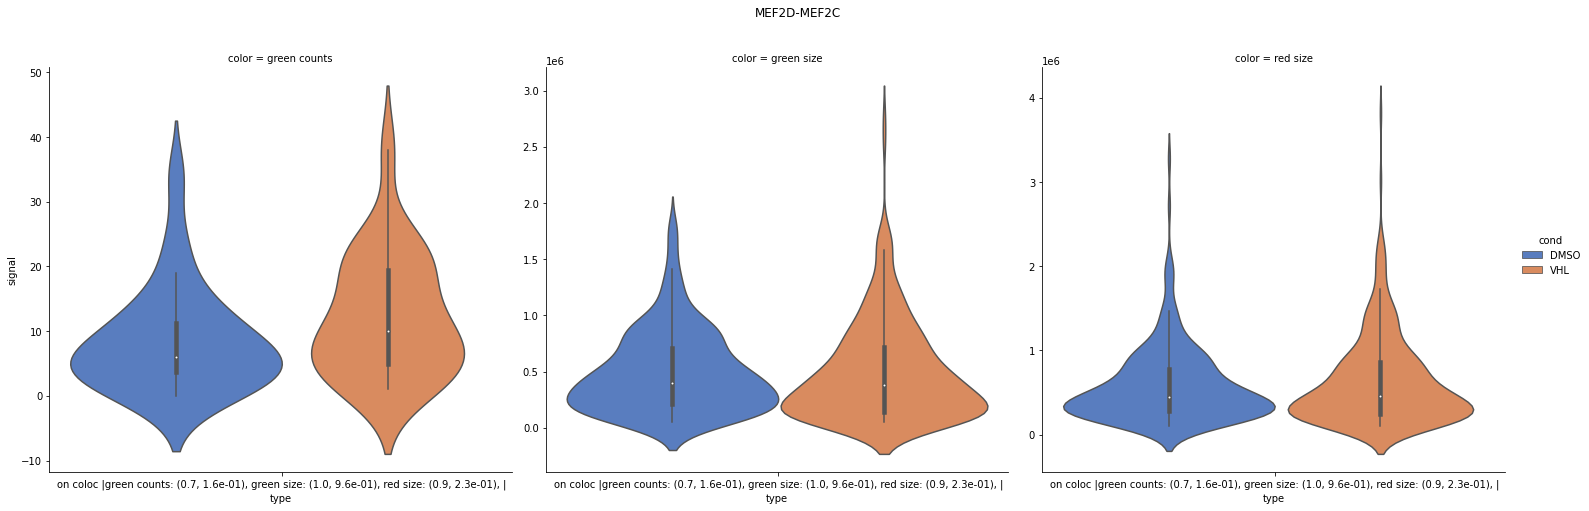

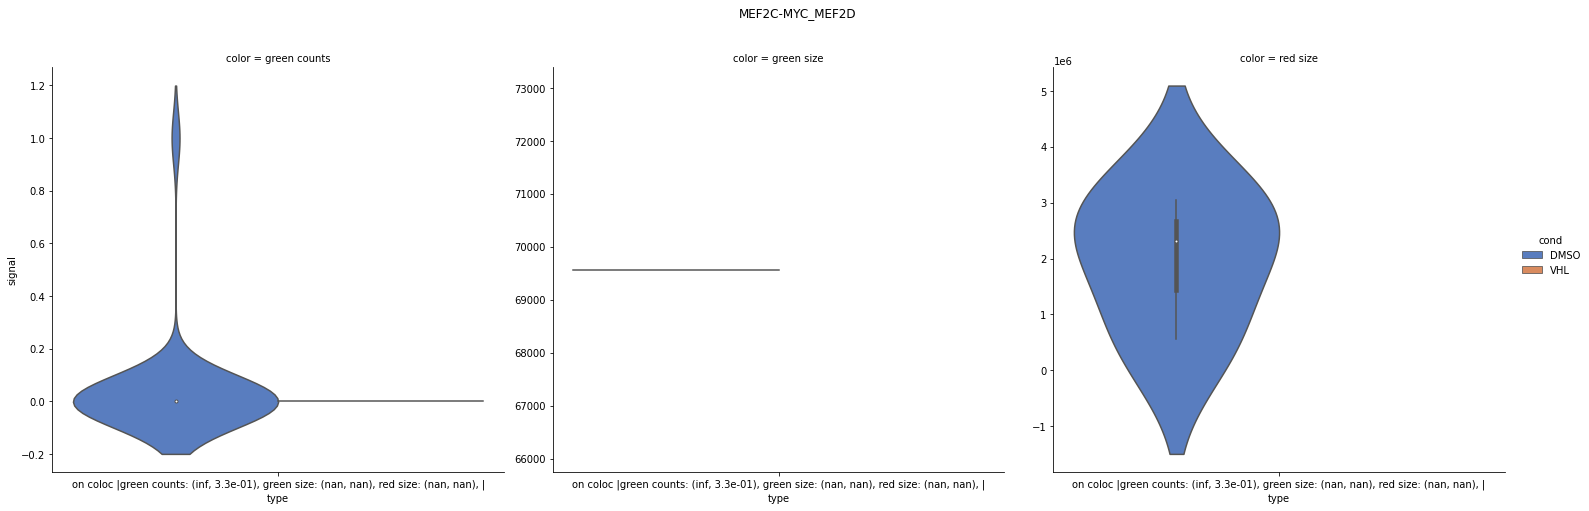

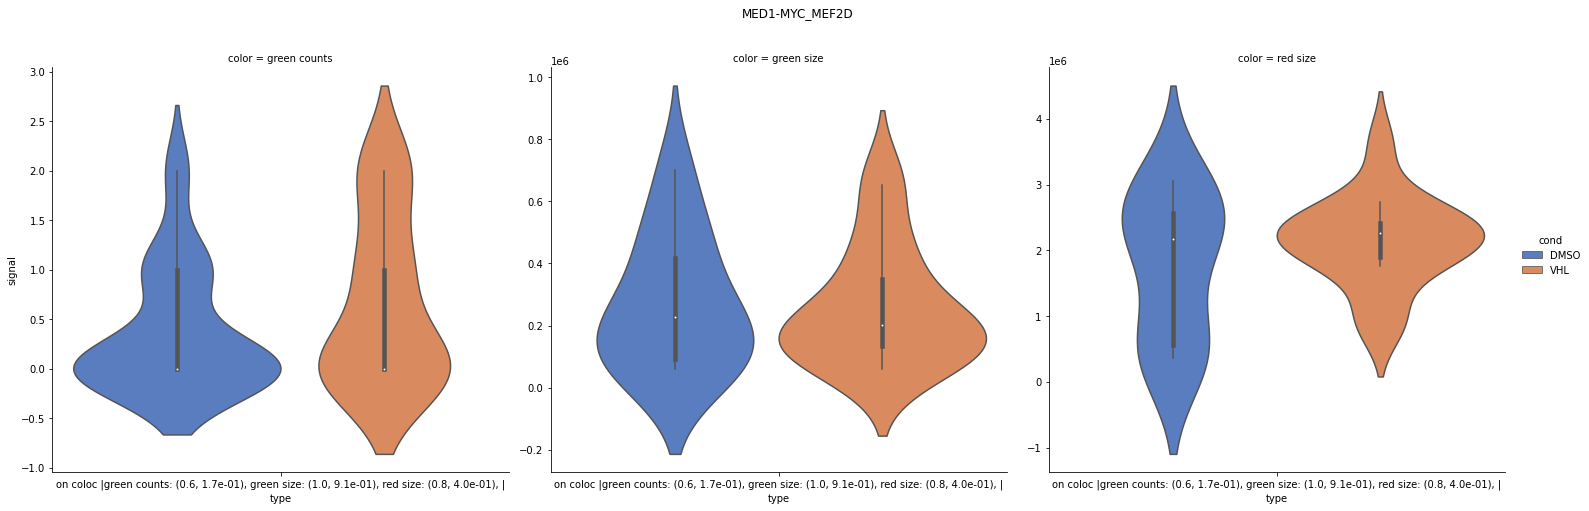

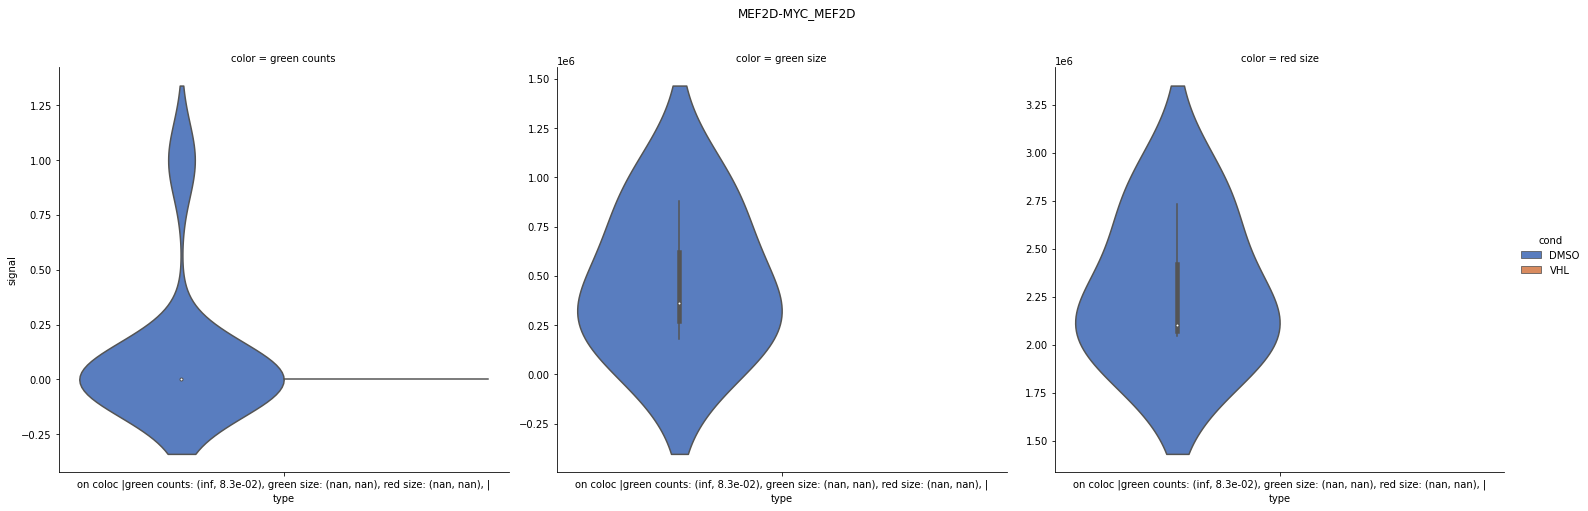

In [203]:
for k, val in data.items():
    g = sns.catplot(kind="violin", x="type", y="signal", hue="cond", col="color", data=val, palette="muted", sharey=False, height=7)
    g.fig.subplots_adjust(top=0.86)
    g.fig.suptitle(k)
    plt.show()
    g.savefig(folder+k+"_violin_oncobinding.pdf")

In [204]:
# compute difference in number/surface/max/min/mean(val) of green /red across cells and cobindings
data = {}
typ = [("sum_green_sum", "green sum"), ('sum_red_sum', "red sum"), ('mean_red_mean', "red mean"), ('mean_green_mean', "green mean"), ("area_sum", "size")]
for k in set(mdots.exp):
    print(k)
    print('______________________________\n')
    at = pd.DataFrame()
    
    for t in ['DMSO', 'VHL']:
        print(t)
        d = mdots[(mdots.exp==k)&(mdots.treat==t)]
        
        # counts per cell
        a = pd.DataFrame()
        b = pd.DataFrame()
        print("\ncount greens per cell:")
        e = [len(d[(d["group"]==cell)&(d['class']=="green")]) for cell in set(d.group)]
        print(min(e))
        print(np.mean(e), np.sqrt(np.var(e)))
        
        b["color"] = ['on green']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        b = pd.DataFrame()
        e = [len(d[(d["group"]==cell)&(d['class']=="red")]) for cell in set(d.group)]
        b["color"] = ['on red']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        b = pd.DataFrame()
        e = [len(d[(d["group"]==cell)&(d['class']=="cobinding")]) for cell in set(d.group)]
        b["color"] = ['on coloc']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        a['type'] = "counts"
        a['cond'] = t
        at = at.append(a)
        
        # TOTAL signal
        
        b = pd.DataFrame()
        print("\ntotal signal greens per cell:")
        e = [sum(d[(d["group"]==cell)&(d['class']=="green")]['sum_green_sum']) for cell in set(d.group)]
        print(min(e))
        print(np.mean(e), np.sqrt(np.var(e)))
        
        b["color"] = ['on green']*len(e)
        b['signal'] = e
        a.append(b)
        
        b = pd.DataFrame()
        e = [sum(d[(d["group"]==cell)&(d['class']=="red")]['sum_red_sum']) for cell in set(d.group)]
        b["color"] = ['on red']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        b = pd.DataFrame()
        e = [sum(d[(d["group"]==cell)&(d['class']=="cobinding")]['sum_green_sum']) for cell in set(d.group)]
        b["color"] = ['on coloc']*len(e)
        b['signal'] = e
        a.append(b)
        
        a['type'] = "total sum"
        a['cond'] = t
        at = at.append(a)
        
        for (col,name) in typ:
            print(name)
            a = pd.DataFrame()
            print('\nsignal in green:')
            e = d[d['class']=="green"][col].tolist()
            print(np.mean(e), np.sqrt(np.var(e)))
            b = pd.DataFrame()
            b['signal'] = e
            b['color'] = "on green"
            a = a.append(b)
            
            print('\nsignal in red:')
            e = d[d['class']=="red"][col].tolist()
            print(np.mean(e), np.sqrt(np.var(e)))
            
            b = pd.DataFrame()
            b['signal'] =  e
            b['color'] = "on red"
            a = a.append(b)

            print('\nsignal in cobinding:')
            e = d[d['class']=="cobinding"][col].tolist()
            print(np.mean(e), np.sqrt(np.var(e)))
            
            b = pd.DataFrame()
            b['signal'] = e
            b['color'] = "on coloc"           
            print('\n\n')
            a = a.append(b)
            a['type']=name
            a['cond'] = t
            at = at.append(a)
        print('____________\n')
    data[k] = at.reset_index(drop=True)

MEF2D-MEF2C
______________________________

DMSO

count greens per cell:
44
176.20833333333334 98.56299980497526

total signal greens per cell:
20551572.0
183995928.79166666 135956525.52790034
green sum

signal in green:
1044195.3868526838 1090924.9205224982

signal in red:
204293.68281604844 235460.46834317574

signal in cobinding:
2230128.1924686194 1819712.193393997



red sum

signal in green:
630505.4849846299 760282.8916356947

signal in red:
3851748.355034065 3325736.438469981

signal in cobinding:
7449976.9037656905 5200705.800964236



red mean

signal in green:
1762.7164494757747 1255.6945865502266

signal in red:
8009.981465159843 1348.9908630348052

signal in cobinding:
7029.062384196019 1771.3648664349198



green mean

signal in green:
2696.2704874380174 764.53724233195

signal in red:
457.2565265253963 401.956048013728

signal in cobinding:
2049.8738762741436 918.977042439268



size

signal in green:
350951.2345708205 305622.5464437199

signal in red:
453365.7789553369 

/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



total signal greens per cell:
85659379.0
175220650.23076922 79978055.88882902
green sum

signal in green:
655218.884797929 885707.2537389585

signal in red:
437963.6153846154 511788.9785279654

signal in cobinding:
1807601.125 1127255.7068378981



red sum

signal in green:
341826.74140658707 492495.12439971993

signal in red:
13509177.5 13476286.736014852

signal in cobinding:
14229042.75 11336731.264397763



red mean

signal in green:
958.45296056953 702.3725717629538

signal in red:
6320.10060373015 3239.8576778443235

signal in cobinding:
5429.218736556748 2337.1212410416583



green mean

signal in green:
1687.8064688153727 512.0564433003924

signal in red:
228.1016624971762 144.8934871766465

signal in cobinding:
1120.3198100561513 535.3894983850737



size

signal in green:
308609.27484539046 292527.7183763028

signal in red:
1663707.3461538462 988730.0679711069

signal in cobinding:
2097409.875 977487.7384397767



____________

VHL

count greens per cell:
70
277.851851851851

In [205]:
# adding chi2
for k,val in data.items():
    for i in set(val['type']):
        e = " |"
        for u in ['on green', "on red", "on coloc"]:#set(val['color']):
            a = val[(val['type'] == i) & (val['color'] == u) & (val['cond'] == "DMSO")]["signal"].tolist()
            b = val[(val['type'] == i) & (val['color'] == u) & (val['cond'] == "VHL")]["signal"].tolist()
            r = ttest_ind(a, b, equal_var=False)
            e+= u + ": ("f"{np.mean(a)/np.mean(b):.1f}, "f"{r[1]:.1e}), "
        val.loc[val[val['type'] == i].index, 'type'] = i + e +"|"
    data[k] = val

<ipython-input-205-13e79356a062>:9: RuntimeWarning: divide by zero encountered in double_scalars
  e+= u + ": ("f"{np.mean(a)/np.mean(b):.1f}, "f"{r[1]:.1e}), "


/home/jeremie/.local/lib/python3.8/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/home/jeremie/.local/lib/python3.8/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn2()` is retained for backwards compatibility; use `venn()` instead
  warn((


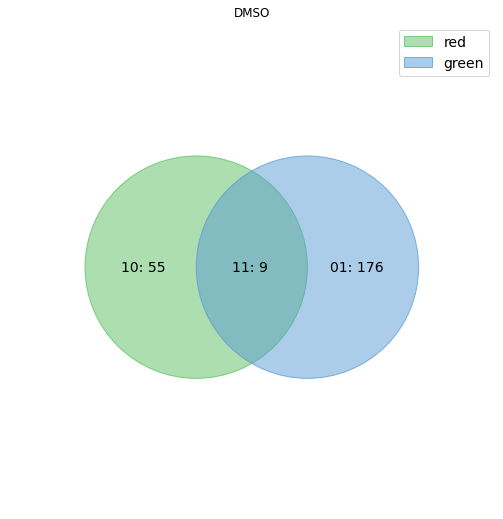

<Figure size 432x288 with 0 Axes>

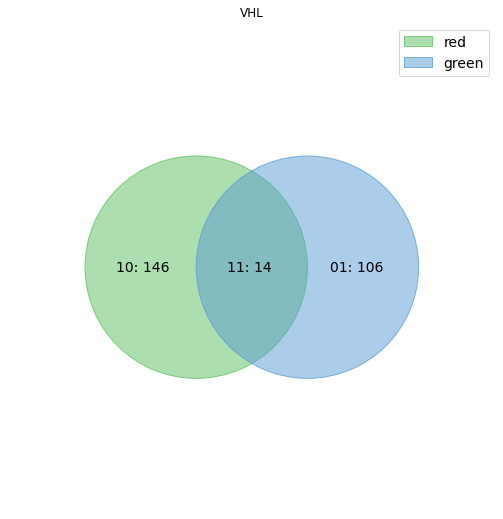

In [206]:
a = data['MEF2D-MEF2C']
for v in ['DMSO','VHL']:
    f = int(a[(a.color=="on green")&(a.cond==v)&(a.type.str.contains('counts'))].signal.mean())
    e = int(a[(a.color=="on red")&(a.cond==v)&(a.type.str.contains('counts'))].signal.mean())
    i = int(a[(a.color=="on coloc")&(a.cond==v)&(a.type.str.contains('counts'))].signal.mean())
    c = f
    f = [u for u in range(f)]
    pe = [u for u in range(c, e+c)]
    c+=e
    e=pe
    e.extend([u for u in range(c, c+i)])
    f.extend([u for u in range(c, c+i)])
    plot.venn([set(e),set(f)], ["red", "green"], title=v)
    plt.savefig(folder+'MEF2D-MEF2C_venn'+v+'_mean_percell.pdf')

### plots

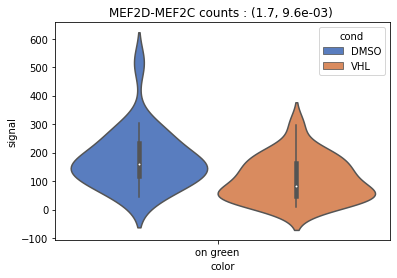

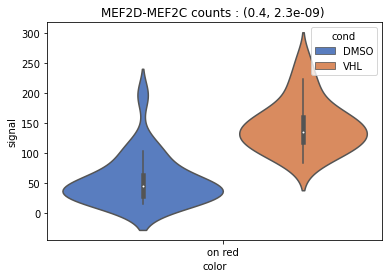

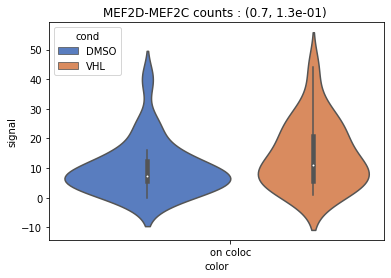

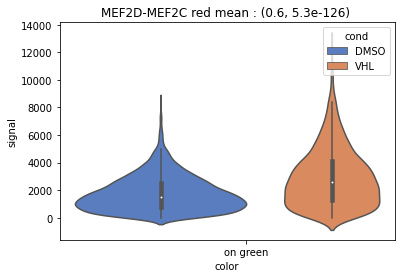

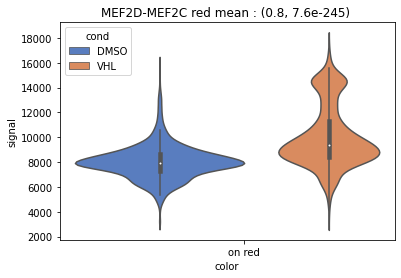

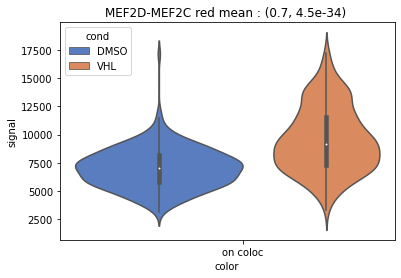

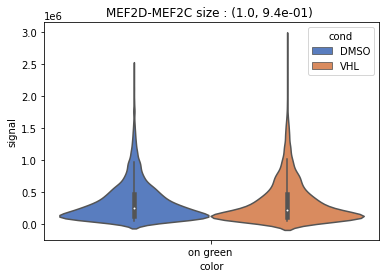

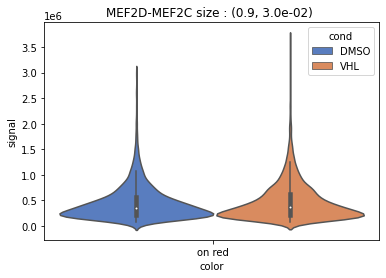

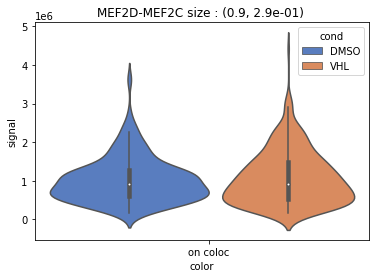

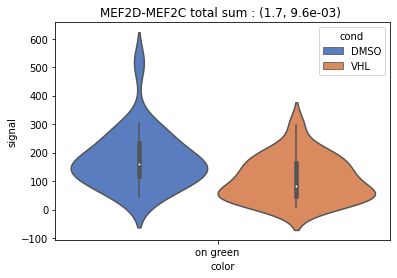

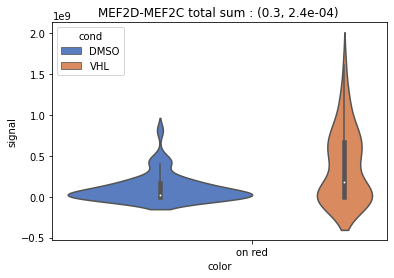

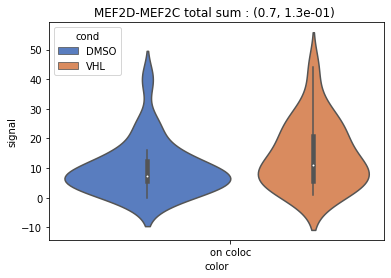

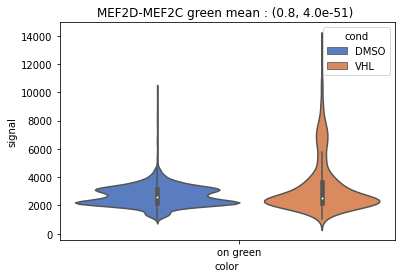

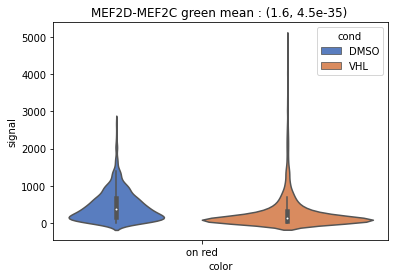

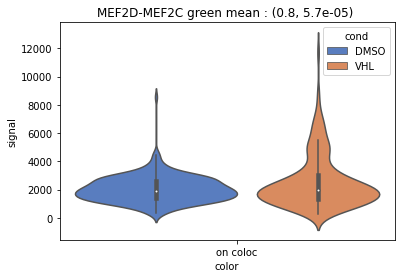

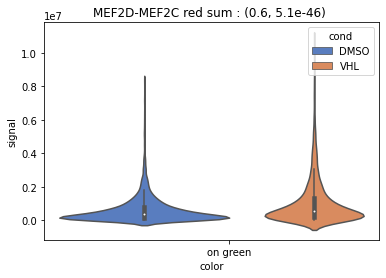

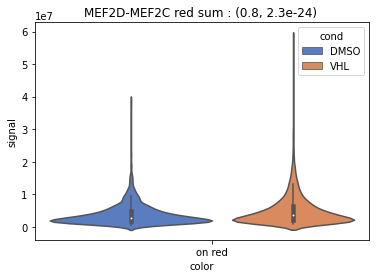

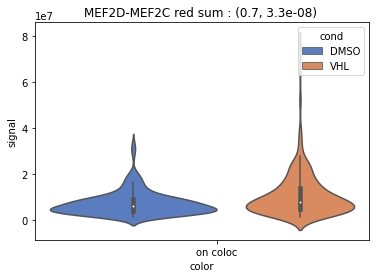

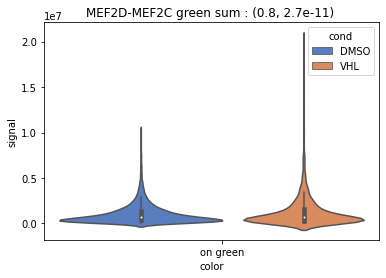

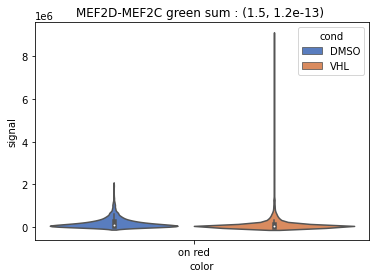

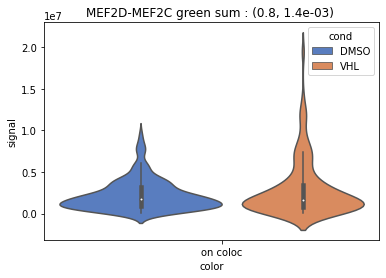

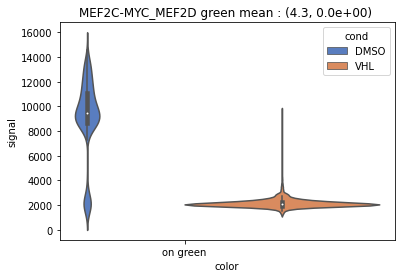

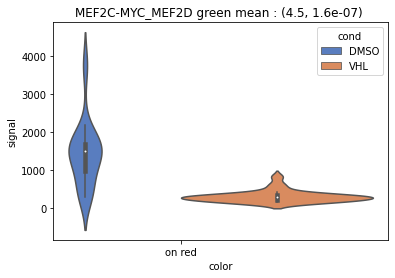

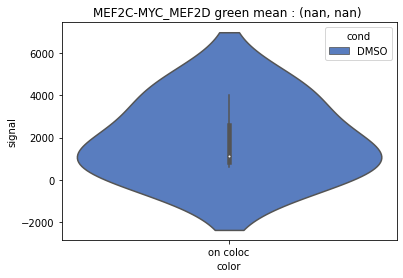

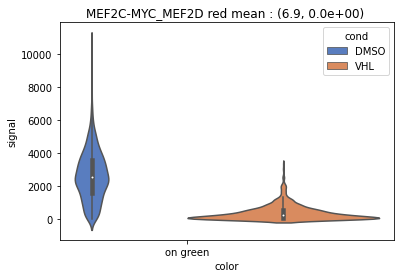

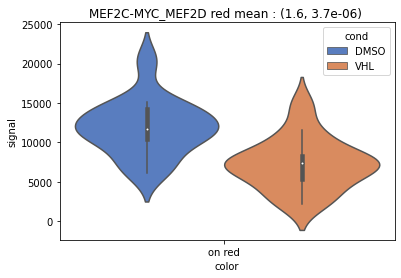

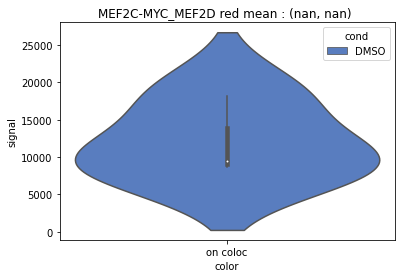

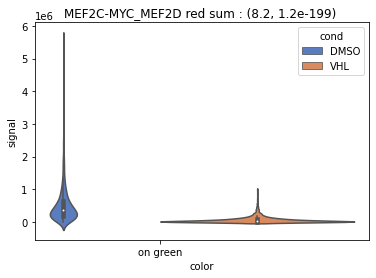

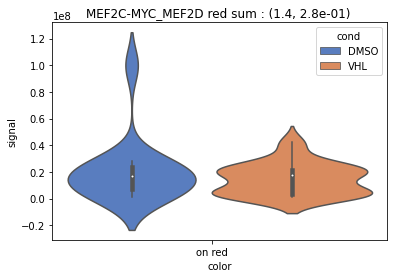

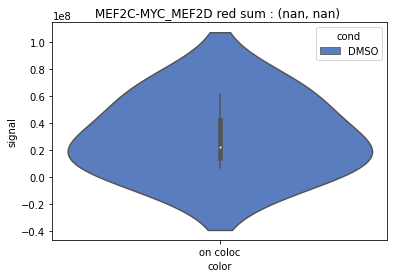

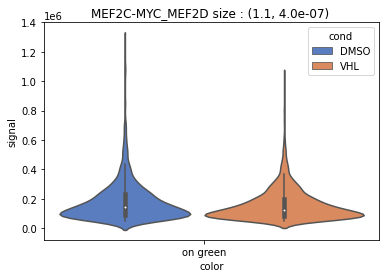

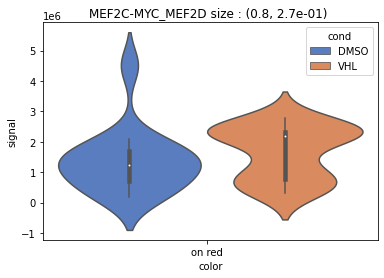

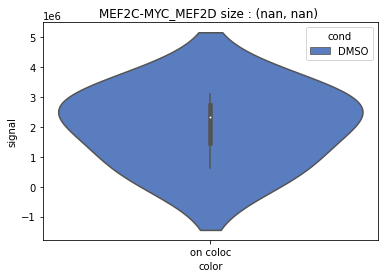

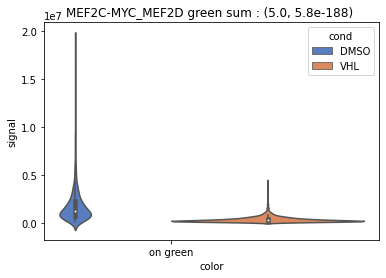

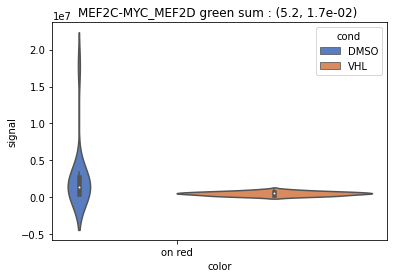

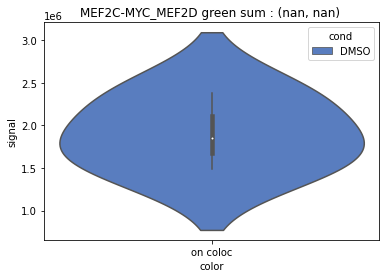

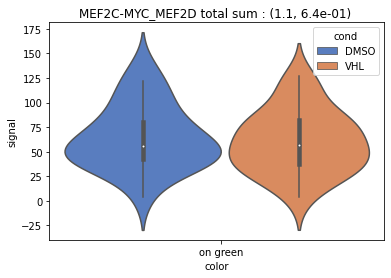

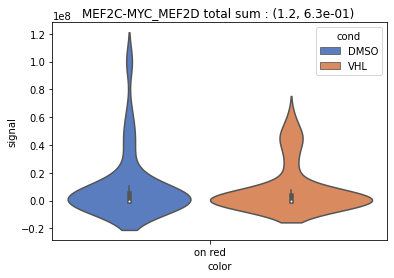

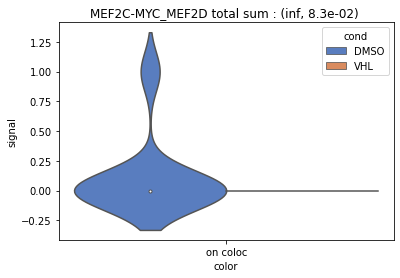

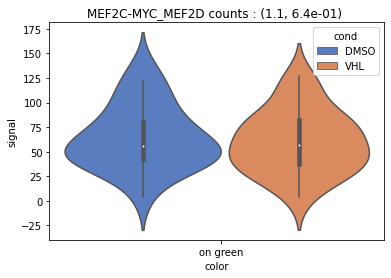

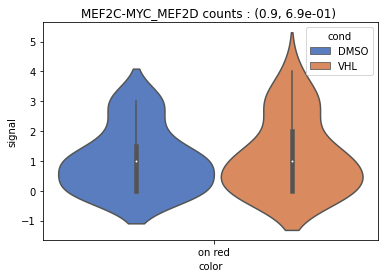

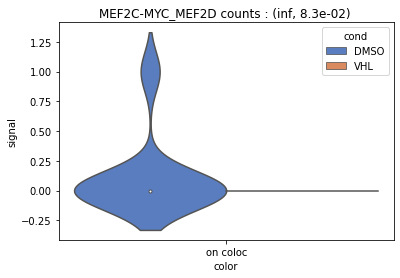

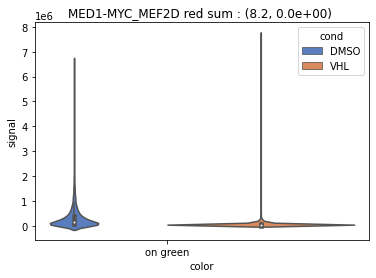

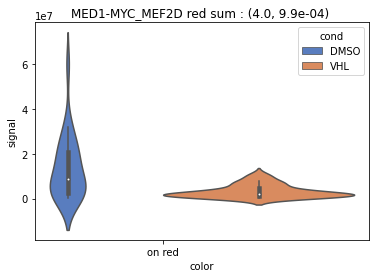

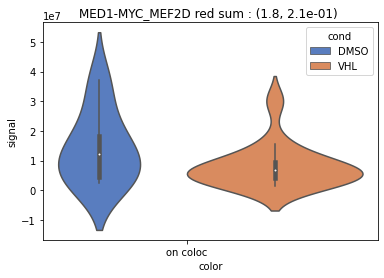

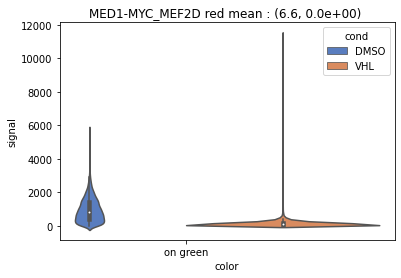

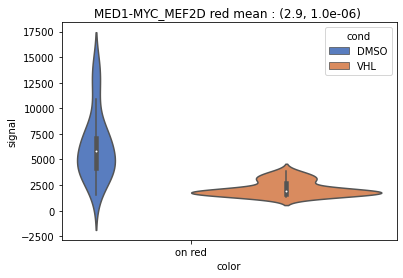

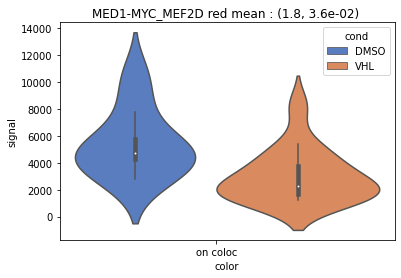

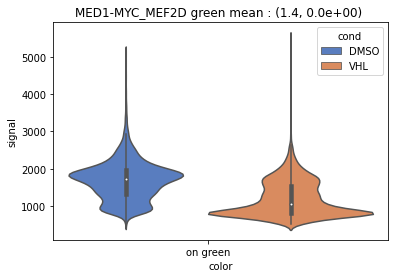

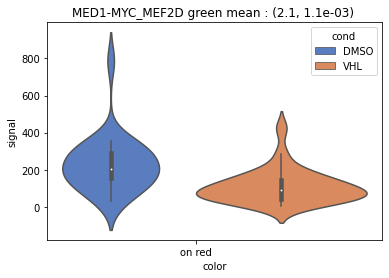

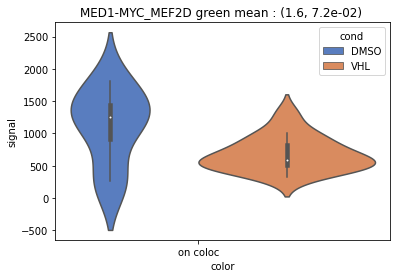

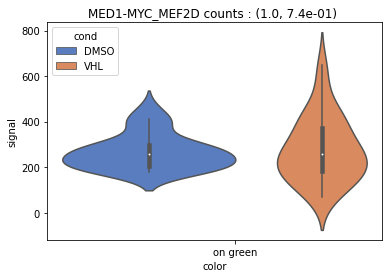

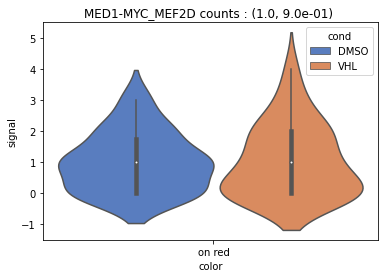

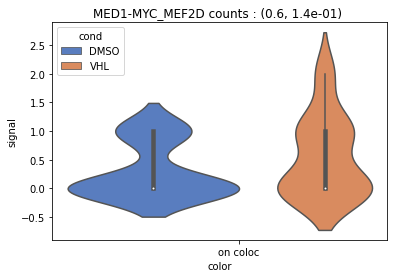

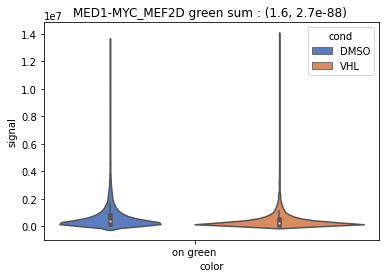

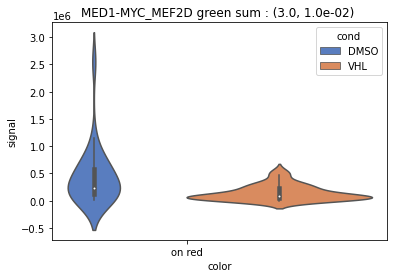

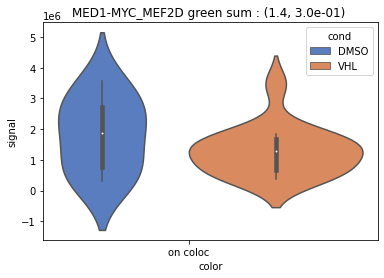

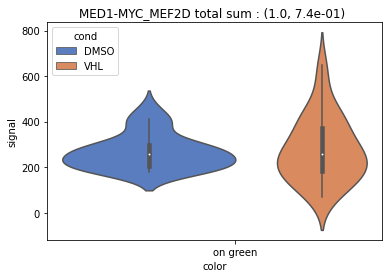

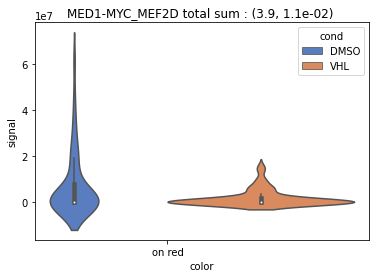

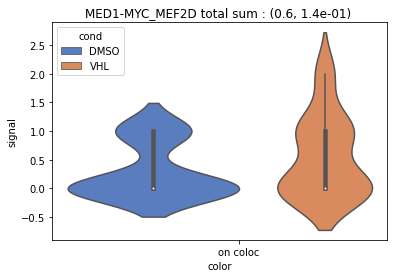

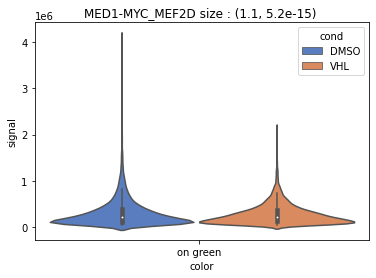

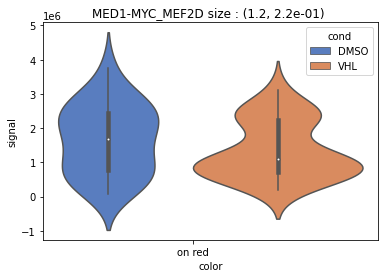

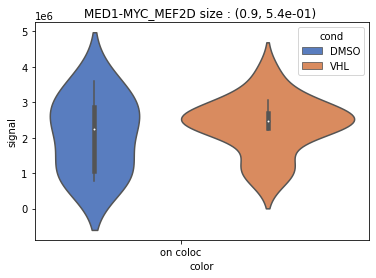

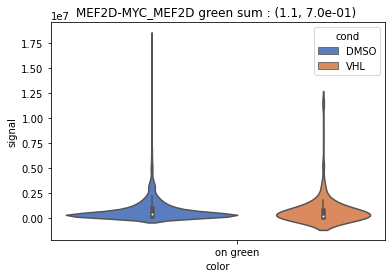

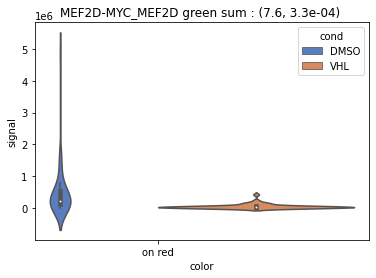

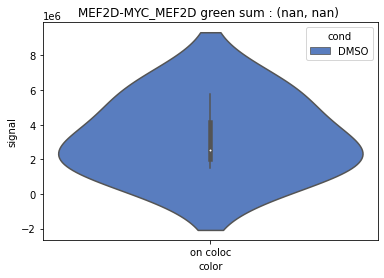

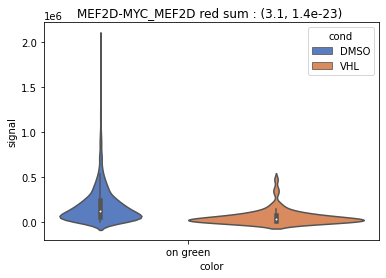

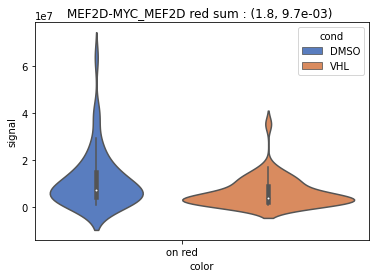

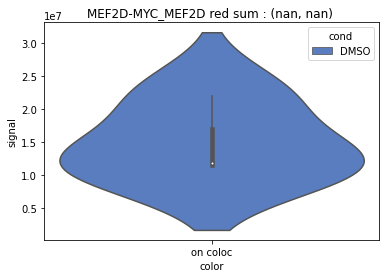

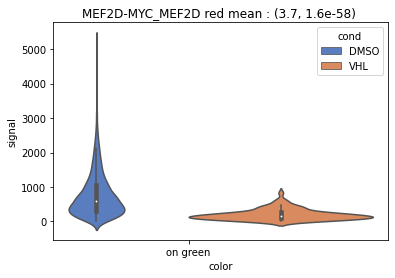

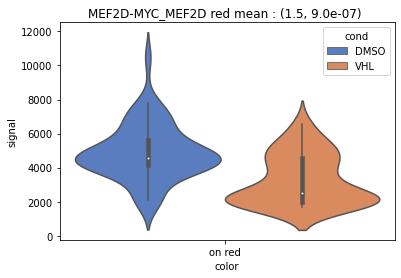

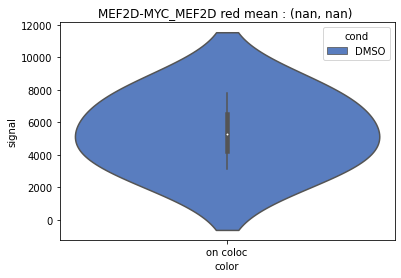

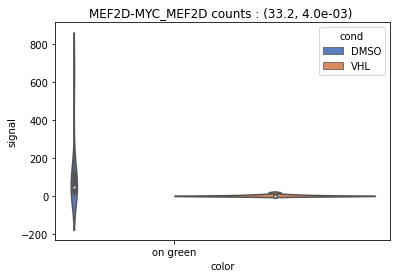

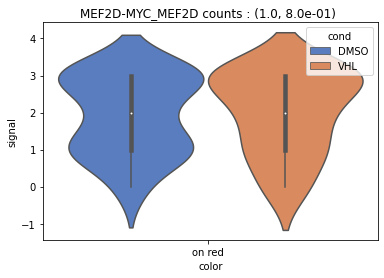

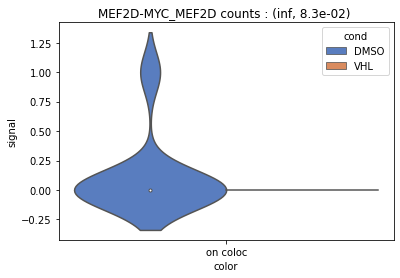

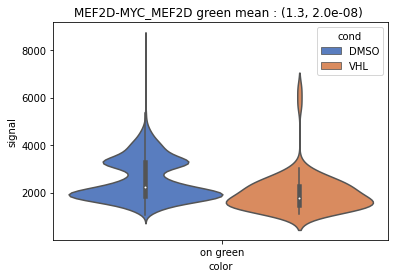

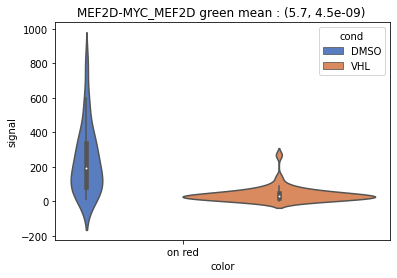

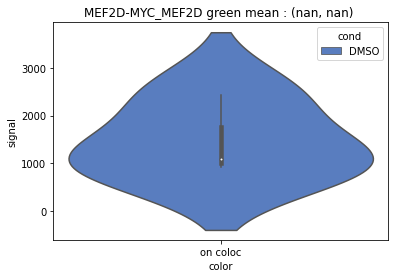

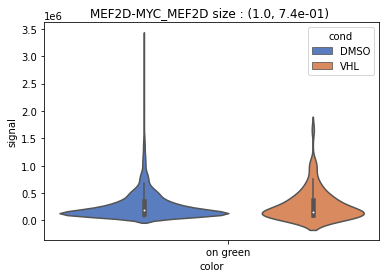

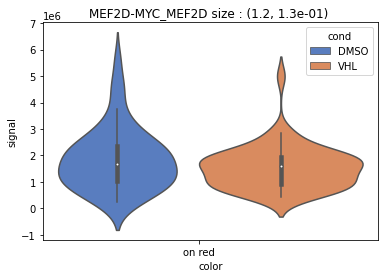

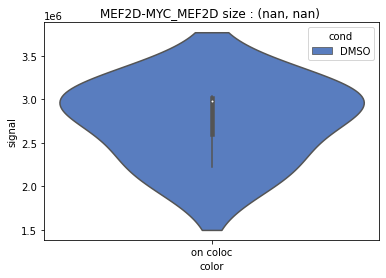

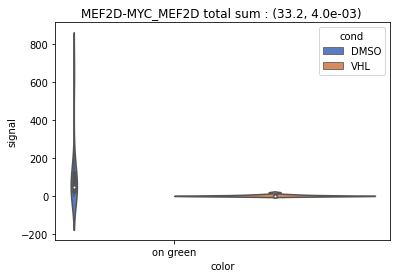

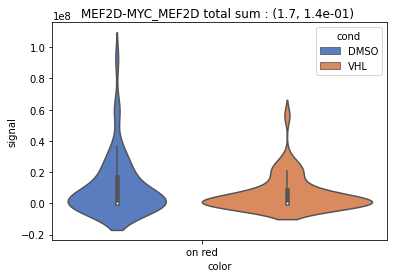

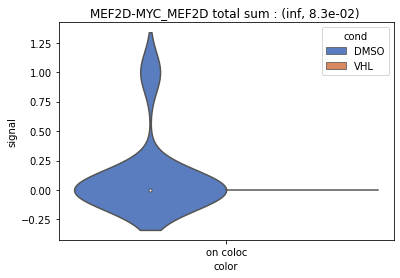

In [211]:
for k, v in data.items():
    for l in set(v['type']):
        for m in set(v['color']):
            ax = sns.violinplot(data = v[(v['type']==l)&(v['color']==m)], x="color", y="signal", hue="cond", palette="muted")
            plt.title(k+" "+l.split('|')[0]+""+l.split(m)[-1].split('),')[0]+") ")
            
            plt.show()
            
            ax.get_figure().savefig(folder+k+'_single_'+l.split(' |')[0]+"_"+m+".pdf")

In [213]:
!cd $folder && git add . && git commit -m "adding violin plot" && git push

[master 63fbe73] adding violin plot
 84 files changed, 0 insertions(+), 0 deletions(-)
To http://github.com/jkobject/AMLproject.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs to 'http://github.com/jkobject/AMLproject.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [214]:
!cd $folder

In [224]:
! git pull

remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 13 (delta 9), reused 13 (delta 9), pack-reused 0
Unpacking objects: 100% (13/13), 8.76 MiB | 9.55 MiB/s, done.
From http://github.com/jkobject/AMLproject
   a1525e5..58f31f1  master     -> origin/master
hint: Pulling without specifying how to reconcile divergent branches is
hint: discouraged. You can squelch this message by running one of the following
hint: commands sometime before your next pull:
hint: 
hint:   git config pull.rebase false  # merge (the default strategy)
hint:   git config pull.rebase true   # rebase
hint:   git config pull.ff only       # fast-forward only
hint: 
hint: You can replace "git config" with "git config --global" to set a default
hint: preference for all repositories. You can also pass --rebase, --no-rebase,
hint: or --ff-only on the command line to override the configured default per
hint: invocation.
Removing 

hint: Waiting for your editor to close the file... 7=▽  ]11;?"~/AMLproject/.git/MERGE_MSG" 6L, 289C[>cMerge branch 'master' of http://github.com/jkobject/AMLproject
# Please enter a commit message to explain why this merge is necessary,
# especially if it merges an updated upstream into a topic branch.
#
# Lines starting with '#' will be ignored, and an empty message aborts
# the commit.
~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                           

In [210]:
folder = '../results/FishSuperResColoc/plots_v3_withfilter/'

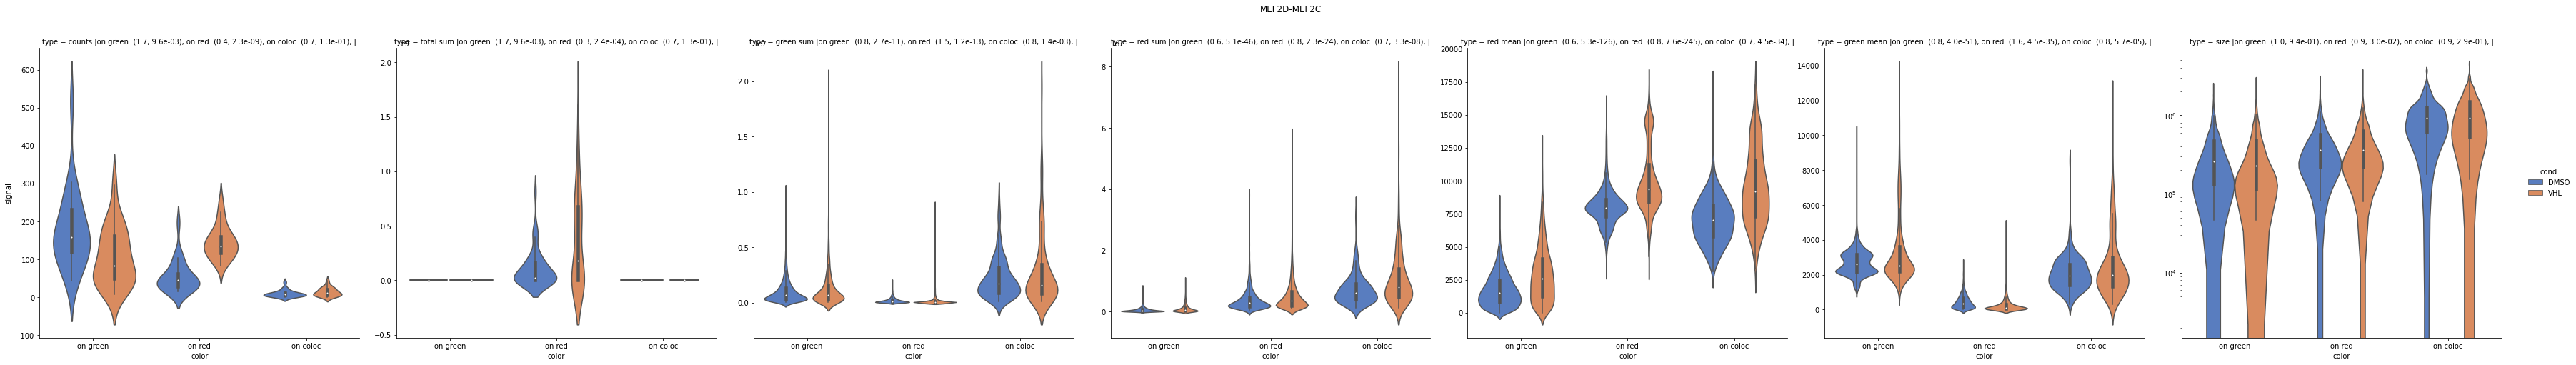

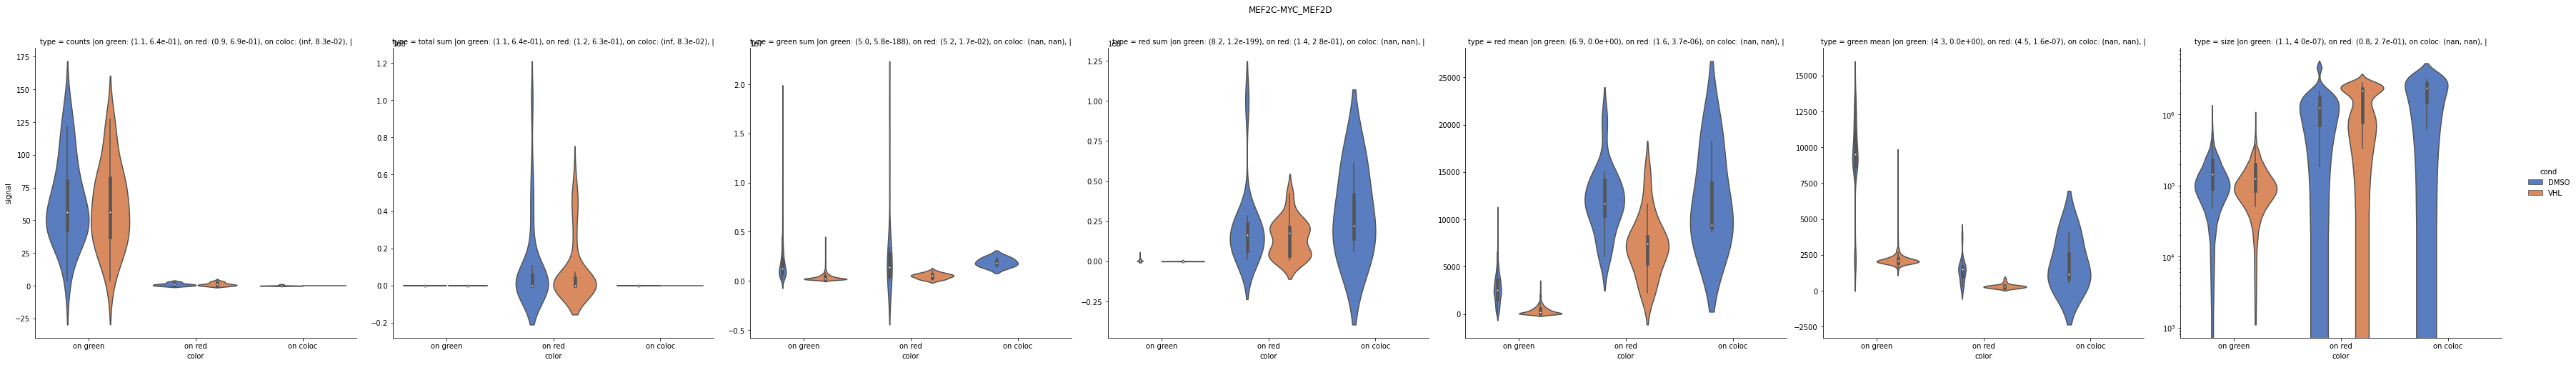

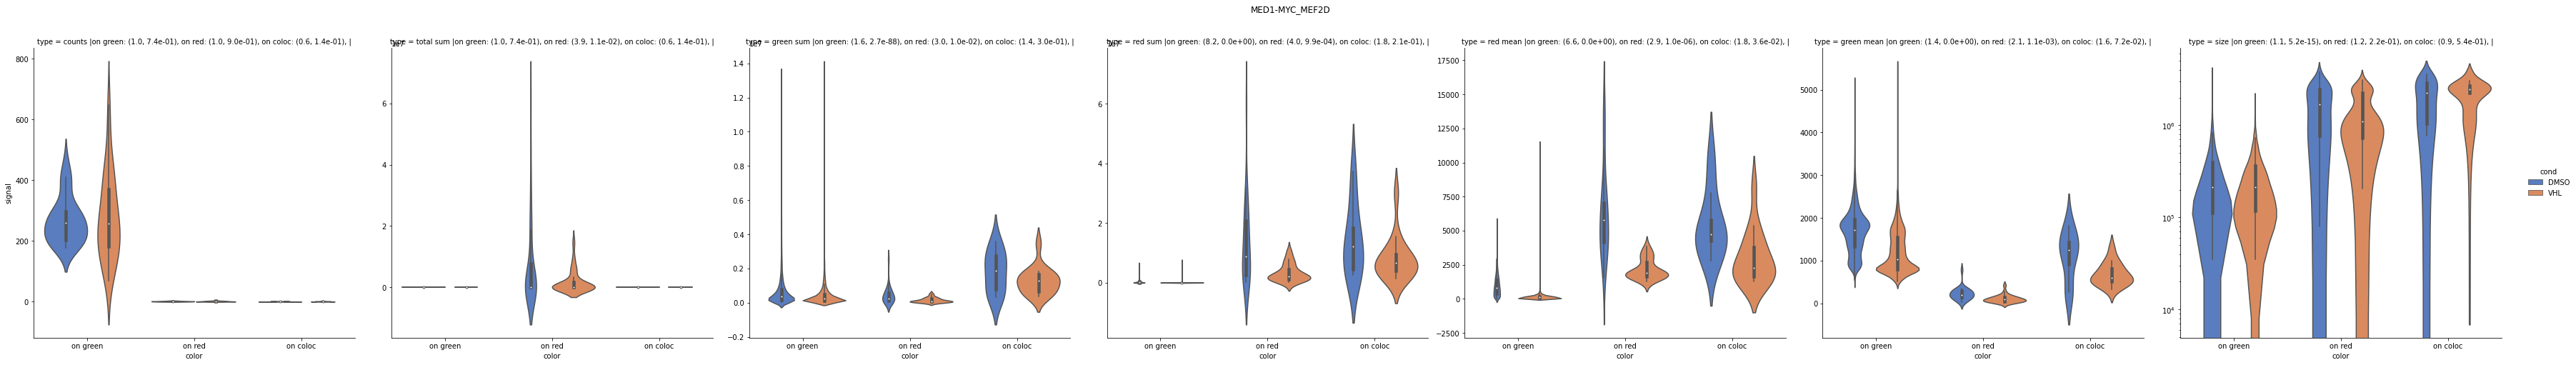

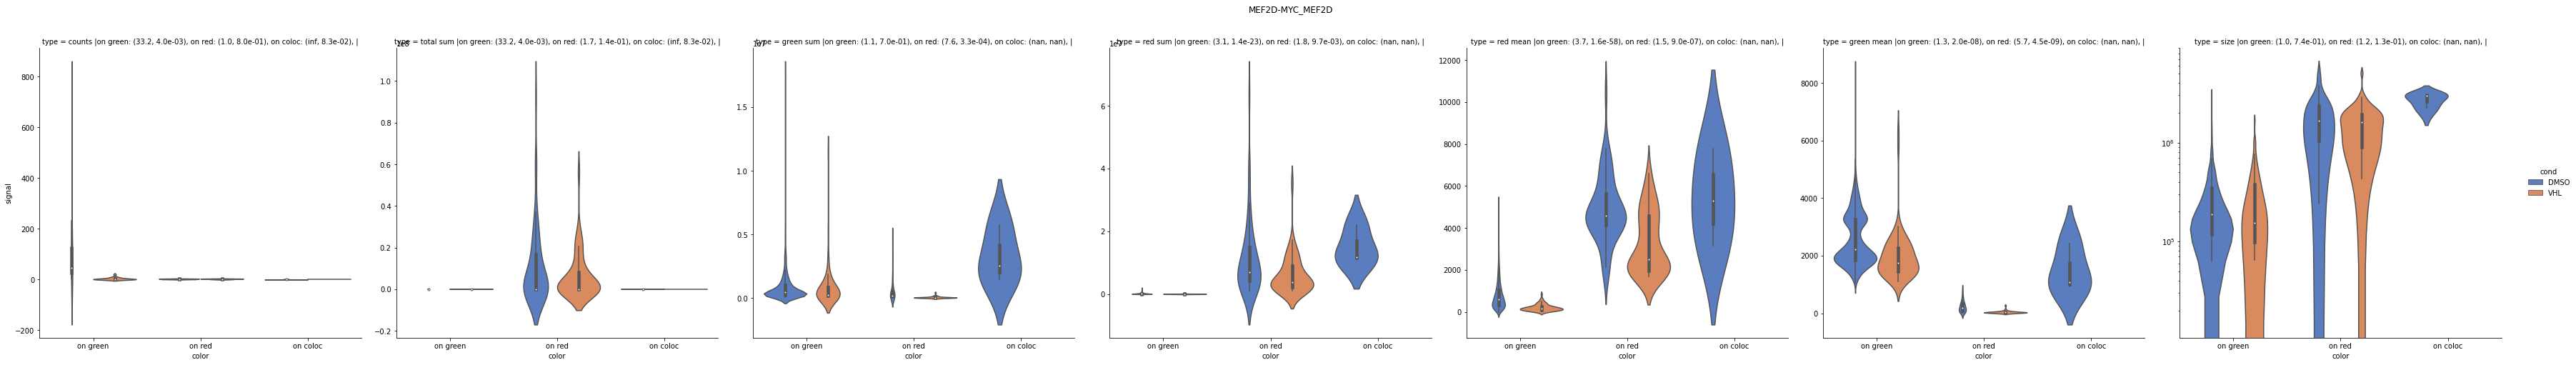

In [179]:
for k, val in data.items():
    g = sns.catplot(kind="violin", x="color", y="signal", hue="cond", col="type", data=val, palette="muted", sharey=False, height=7)
    g.fig.subplots_adjust(top=0.86)
    g.fig.suptitle(k)
    plt.yscale('log')
    plt.show()
    g.savefig(folder+k+"_violin_all.pdf")

## likelyhood of coloc compared to expectation for each experiment &  between conditions

### text

In [106]:
# compute dot likelyhood of coloc compared to expectation for each experiment &  between conditions
enrichment = {}

for k in set(mdots.exp):
    count = []
    fisher = []
    print('______________________________')
    print(k)
    for e in ['DMSO', 'VHL']:
        d = mdots[(mdots.exp==k)&(mdots.treat==e)]
        allredcount = len(d[d['class']!="green"])
        try:
            obs_cob = len(d[d['class']=="cobinding"])/allredcount
        except ZeroDivisionError:
            print('no red dot')
            continue
        obs_green = d[d['class']=="green"].area_sum.sum() * call_scale
        pred_cob = obs_green / mcells[(mcells.exp==k)&(mcells.treat==e)].area_sum.sum()
        #print(obs_cob, obs_green, pred_cob)
        count.append(obs_cob/pred_cob)
        print(e+": "+str(obs_cob/pred_cob))
        a = pred_cob*allredcount
        b = obs_cob*allredcount
        f = fisher_exact(np.array([[b, allredcount - b], [a, allredcount - a]], dtype=int))
        if f[0] is np.inf:
            f = (obs_cob/pred_cob, f[1])
        fisher.append(f)
    enrichment[k] = fisher
    print("change: "+str(count[1]/count[0]))

______________________________
MEF2D-MEF2C
DMSO: 13.841794817020828
VHL: 11.898415397041463
change: 0.8596006193077178
______________________________
MEF2C-MYC_MEF2D
DMSO: 32.48757909016166
VHL: 0.0
change: 0.0
______________________________
MED1-MYC_MEF2D
DMSO: 10.209055232858642
VHL: 20.621252445517072
change: 2.0198982153751075
______________________________
MEF2D-MYC_MEF2D
DMSO: 13.410769966229607
VHL: 0.0
change: 0.0


In [89]:
enrichment

{'MED1-MYC_MEF2D': [(13.286549707602338, 8.526742357856943e-08),
  (13.40650406504065, 3.3548918227858856e-08)],
 'MEF2D-MEF2C': [(13.765392619663977, 8.900704667190583e-71),
  (11.80540436395164, 1.3076621379695384e-86)],
 'MEF2C-MYC_MEF2D': [(21.880783168647376, 0.24117647058823483), (nan, 1.0)],
 'MEF2D-MYC_MEF2D': [(9.295838849369968, 0.12108368652871485),
  (57.997523967051634, 1.0)]}

### plot

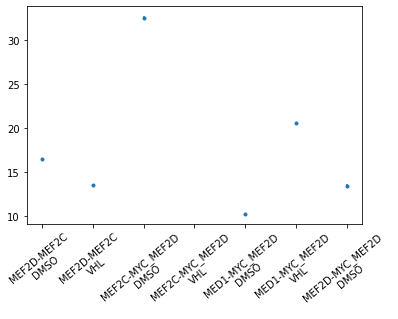

In [107]:
x=[]
y=[]
e=[]
for k, val in enrichment.items():
    x.append(k+'\nDMSO')
    y.append(val[0][0])
    e.append(val[0][1])
    x.append(k+'\nVHL')
    y.append(val[1][0])
    e.append(val[1][1])
plt.errorbar(x, y, e, linestyle='None', marker='.')
plt.xticks(rotation = 40) # Rotates X-Axis Ticks by 45-degrees
plt.savefig(folder+'enrichments.pdf')

## plot of averaged binned signal by distance from focis

In [134]:
# make a plot of averaged binned signal strength by distance from locis
dists= {}
newdists = {}
for val in set(mdots.exp):
    for e in ['DMSO', 'VHL']:
        d = adots[(adots.exp==val)&(adots.treat==e)]
        dist = []
        weight = []
        newdist = []
        m = mred[(mred.exp==val)&(mred.treat==e)]
        print(val, e)
        for i,(k, v) in enumerate(m.iterrows()):
            h.showcount(i, len(m))
            dist.append(distance_matrix(d[(d['class']=="green")&(d.group==v.group)][['x', "y", "z"]].values, np.array([v[['x_mean', "y_mean", "z_mean"]]])).T[0].astype(float))
            weight.append(d[(d['class'] == "green")&(d.group==v.group)]["mean_green"])
            a = d[(d['class']=="green")&(d.group==v.group)][['x',"y","z","mean_green","area","m_id"]].values
            a[:,:3] = a[:,:3] - v[['x_mean', "y_mean", "z_mean"]].values
            newdist.append(a)
        newdists[val+e] = np.vstack(newdist)
        dists[val+e] = [np.hstack(dist), np.hstack(weight)]

MEF2D-MEF2C DMSO
MEF2D-MEF2C VHL
MEF2C-MYC_MEF2D DMSO
MEF2C-MYC_MEF2D VHL
MED1-MYC_MEF2D DMSO
MED1-MYC_MEF2D VHL
MEF2D-MYC_MEF2D DMSO
MEF2D-MYC_MEF2D VHL


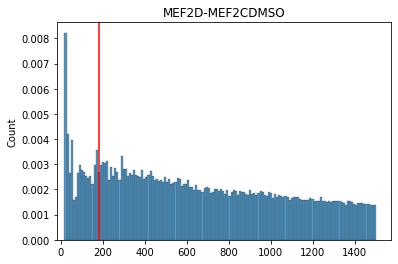

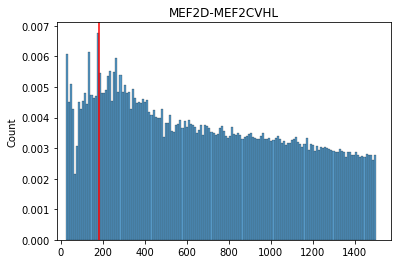

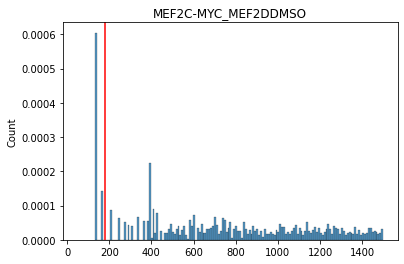

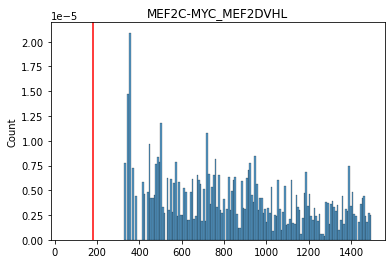

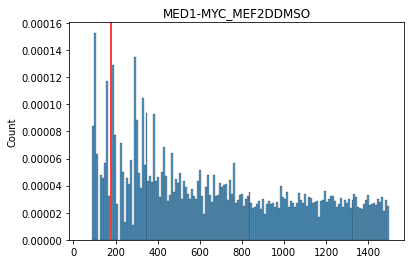

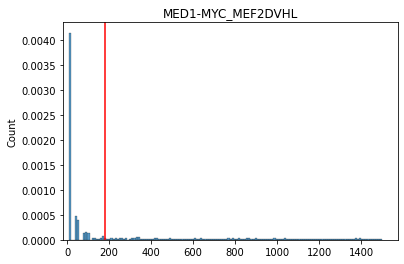

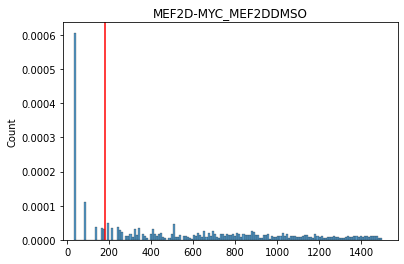

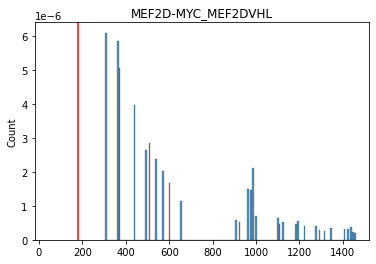

In [135]:
size=1500
bins = 150
defa = size/bins
for k, v in dists.items():
    plt.title(k)
    scale = ((4.19*(defa+v[0][v[0]<size]))**3)-((4.19*(v[0][v[0]<size]))**3)
    ax = sns.histplot(x=v[0][v[0]<size], weights=v[1][v[0]<size]/scale, bins=bins, fill=True)
    plt.axvline(x=180, color="red")
    ax.set(xlim=(-20,None))
    plt.show()
    ax.get_figure().savefig(folder+k+'_1D_distances_from_red.pdf')

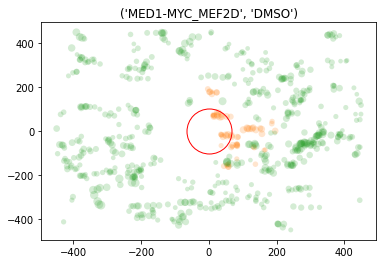

<Figure size 432x288 with 0 Axes>

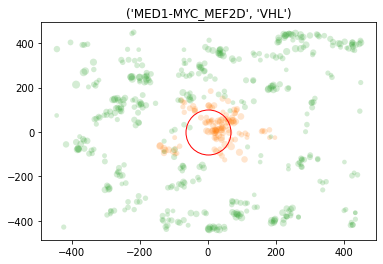

<Figure size 432x288 with 0 Axes>

In [193]:
size=450
zsize=1000
for k in [('MED1-MYC_MEF2D','DMSO'),('MED1-MYC_MEF2D','VHL')]:
    
    a = pd.DataFrame(data=newdists[''.join(k)], columns=['x','y','z','sum_green','area',"m_id"])
    l = mdots[(mdots.exp==k[0])&(mdots.treat==k[1])&(mdots['class']=="cobinding")].index.tolist()
    
    a['area'] = ((a['area']/(6.28))**(1/2))/2
    a = a[(abs(a.x)<size) & (abs(a.y)<size) & (abs(a.z)<zsize)]
    b = a[a.m_id.isin(l)]
    a = a[~a.m_id.isin(l)]
    fig, ax = plt.subplots()
    ax.scatter(b['x'], b['y'], c='tab:orange', s=b['area'].astype(float), alpha=0.2, edgecolors='none')
    ax.scatter(a['x'], a['y'], c='tab:green', s=a['area'].astype(float), alpha=0.2, edgecolors='none')
    plt.title(k)
    
    ax.plot([0], [0], 'o', ms=45, markerfacecolor="None",
         markeredgecolor='red', markeredgewidth=1)
    
    plt.show()
    
    plt.savefig(folder+''.join(k)+"_scatter_representation_size_to_center.pdf")

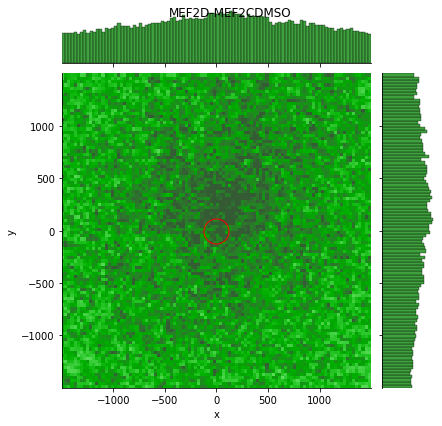

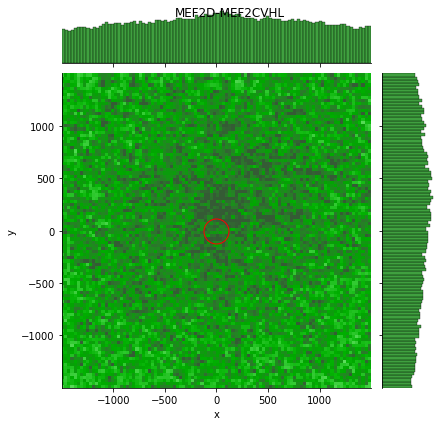

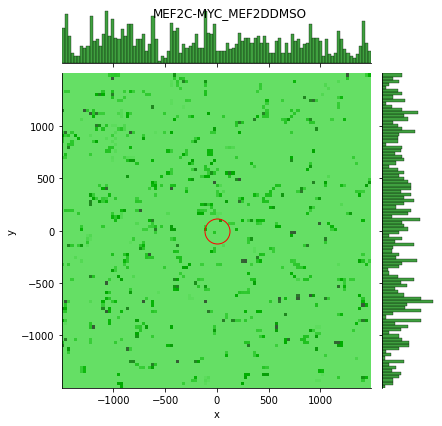

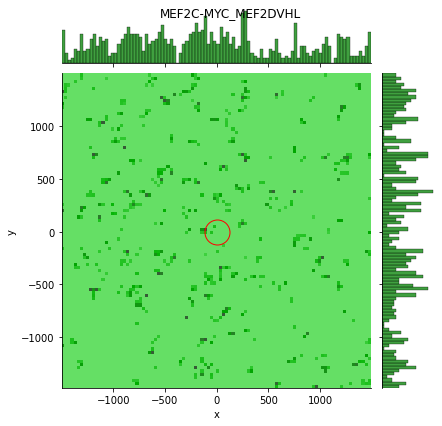

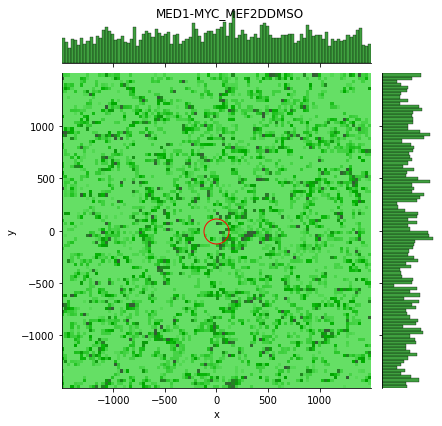

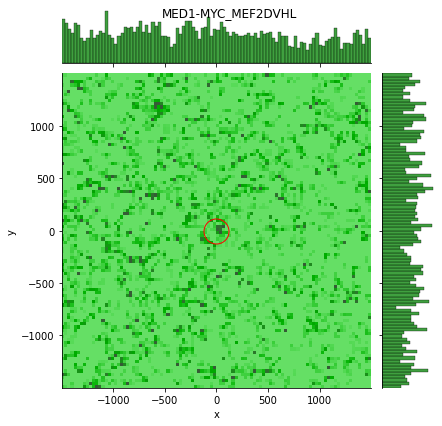

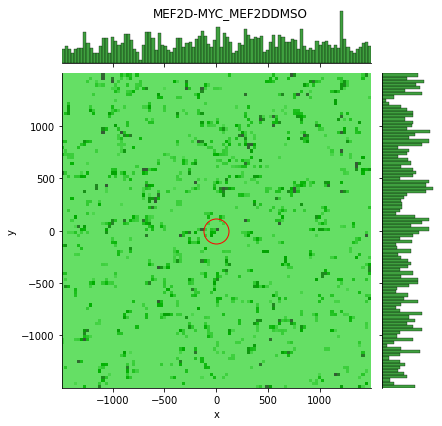

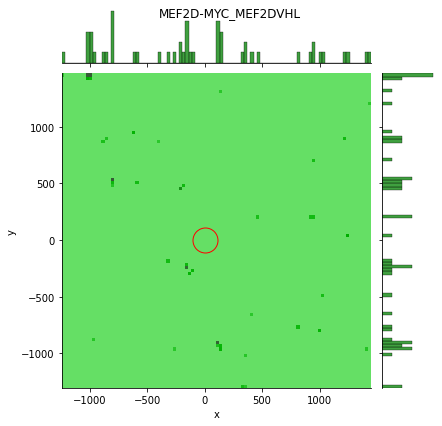

In [136]:
size=1500
bins=100
s = 25
for k, v in newdists.items():
    v = pd.DataFrame(data=v[:,:-1], columns=['x','y','z','sum_green',"area"]).astype(float)
    p = sns.jointplot(data=v[(abs(v.x)<size) & (abs(v.y)<size) & (abs(v.z)<size)], x="x", y="y",  kind="hist", weights=v[(abs(v.x)<size) & (abs(v.y)<size)& (abs(v.z)<size)].sum_green/100000, bins=bins, marginal_kws=dict(bins=bins), color="green", common_norm=True, pmax=.9, thresh=None)
    # gridsize=50, kind="hex", marginal_kws=dict(bins=50))
    # hue="sum_green_sum")
    x_values = [0]#, 2, 3, 4]
    y_values = [0]#, 0, 0, 0]
    p.ax_joint.plot(x_values, y_values, 'o', ms=s, markerfacecolor="None",
         markeredgecolor='red', markeredgewidth=1)
    p.fig.suptitle(k)
    plt.show()
    p.savefig(folder+k+'_2D_distances_from_red.pdf')

In [ ]:
# apply plot to old data from juliana    

In [ ]:
# make a nice fake plot
sns.plot()

In [194]:
mv $folder '../results/FishSuperResColoc/plots_v3_withfilter/'

## saving

In [200]:
! cd .. && git add . && git commit -m "adding whiskers" && git push

[master a1525e5] adding whiskers
 292 files changed, 324615 insertions(+), 10805 deletions(-)
 rewrite notebooks/Fish_SuperRes.ipynb (66%)
 create mode 100644 results/FishSuperResColoc/plots_v3_withfilter/MED1-MYC_MEF2DDMSO_1D_distances_from_red.pdf
 create mode 100644 results/FishSuperResColoc/plots_v3_withfilter/MED1-MYC_MEF2DDMSO_2D_distances_from_red.pdf
 create mode 100644 results/FishSuperResColoc/plots_v3_withfilter/MED1-MYC_MEF2DDMSO_scatter_representation_size_to_center.pdf
 create mode 100644 results/FishSuperResColoc/plots_v3_withfilter/MED1-MYC_MEF2DVHL_1D_distances_from_red.pdf
 create mode 100644 results/FishSuperResColoc/plots_v3_withfilter/MED1-MYC_MEF2DVHL_2D_distances_from_red.pdf
 create mode 100644 results/FishSuperResColoc/plots_v3_withfilter/MED1-MYC_MEF2DVHL_scatter_representation_size_to_center.pdf
 create mode 100644 results/FishSuperResColoc/plots_v3_withfilter/MED1-MYC_MEF2D_single_counts _on coloc.pdf
 create mode 100644 results/FishSuperResColoc/plots_v3_wi

Enumerating objects: 233, done.
Counting objects: 100% (233/233), done.
Delta compression using up to 8 threads
Compressing objects: 100% (227/227), done.
Writing objects: 100% (227/227), 39.30 MiB | 4.56 MiB/s, done.
Total 227 (delta 196), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (196/196), completed with 4 local objects.
remote: warning: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.
remote: warning: See http://git.io/iEPt8g for more information.
remote: warning: File results/FishSuperResColoc/v3_annotated_green.csv is 85.88 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: warning: File results/FishSuperResColoc/v3_all.csv is 99.44 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: 
remote: GitHub found 1 vulnerability on jkobject/AMLproject's default branch (1 moderate). To find out more, visit:
remote:      https://github.com/jkobject/AMLp